In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

pd.set_option("display.max_columns",0)

In [35]:
TA_REVIEW_DATA_PATH = os.path.join("..","..","data","TA_User_Reviws_Korea_all.json")
df2 = pd.read_json(TA_REVIEW_DATA_PATH)

In [36]:
df2.head(5)

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,__typename,location.locationId,location.name,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.__typename,location.placeType,location.isGeo,location.parentGeoId,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,location.reviewSummary.__typename,location.thumbnail.id,location.thumbnail.photoSizes,location.thumbnail.__typename,location.parent.locationId,location.parent.parentGeoId,location.parent.name,location.parent.additionalNames.long,location.parent.additionalNames.__typename,location.parent.__typename,location.route.url,location.route.__typename,location.socialStatistics.isSaved,location.socialStatistics.__typename,location.__typename,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.__typename,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.avatar.__typename,userProfile.hometown.locationId,userProfile.hometown.fallbackString,userProfile.hometown.location,userProfile.hometown.__typename,userProfile.expertForums.generalForumIds,userProfile.expertForums.geoForumLocationIds,userProfile.expertForums.__typename,userProfile.route.url,userProfile.route.__typename,userProfile.__typename,userProfile.isFollowing,userProfile.followerCount,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isBoosted,socialStatistics.boostCount,socialStatistics.likeCount,socialStatistics.isReposted,socialStatistics.repostCount,socialStatistics.isSaved,socialStatistics.tripCount,socialStatistics.__typename,route.url,route.__typename,tripInfo.stayDate,tripInfo.__typename,userProfile.hometown.location.locationId,userProfile.hometown.location.name,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.additionalNames.__typename,userProfile.hometown.location.parent.locationId,userProfile.hometown.location.parent.name,userProfile.hometown.location.parent.__typename,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,Review,14159911,Hotel Gracery Seoul,"Hotel Gracery Seoul, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,86.0,4.0,14159911.0,LocationReviewSummary,361115988.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d14159911-Reviews-Hotel_...,LocationDetailRoute,False,SocialStatistics,LocationInformation,F9AD0C1F6409A1574AD0AFC237D2A4CE,False,False,nataliea328,nataliea328,7,ContributionCounts,452388042.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,NaN,None,NaN,MemberLocation,[],[],ExpertForums,/Profile/nataliea328,MemberProfileRoute,MemberProfile,0.0,0.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d14159911-r748454819-...,ShowUserReviewRoute,2020-02-29,TripInfo,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,1958940,Hongik University Street,"Hongik University Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,2256.0,4.5,1958940.0,LocationReviewSummary,38633900.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",Additiona

In [6]:
df['location.placeType'].value_counts()

ACCOMMODATION    14421
EATERY           12118
ATTRACTION       10540
ACTIVITY           117
CITY                 1
Name: location.placeType, dtype: int64

In [7]:
df[df['location.placeType'] == "EATERY"]['location.additionalNames.long'].value_counts()

Myeongdong Kyoja Main, South Korea                        166
Tosokchon Samgyetang, South Korea                         126
Yoogane Myeongdong 1st Store, South Korea                  37
Isaac Toast Myeongdong, South Korea                        37
Sinseon Seolleongtang Myeongdong, South Korea              31
                                                         ... 
Guryongpo Gyejeol Hoejib, South Korea                       1
Seongsu Kalguksu, South Korea                               1
Starbucks Jinju Gyeongsang National Univ., South Korea      1
Yugane Dakgalbi Cheonho, South Korea                        1
Hyeongje Yukheo, South Korea                                1
Name: location.additionalNames.long, Length: 7066, dtype: int64

## 2차 데이터 추가 

In [4]:
DATA_PATH = lambda x: os.path.join("..","..","data",x)

In [5]:
df_hotel = pd.read_json(DATA_PATH("TA_Hotel_Reviews.json"))
df_eat = pd.read_json(DATA_PATH("TA_Seoul_Eatery_Reviews.json"))

In [ ]:
df = pd.concat([df_hotel, df_eat])
df = df.reset_index(drop=True)

In [ ]:
df = df.dropna(subset=['userId'])
df = df.dropna(axis=1)
df = pd.concat([df, df2])

## Version 2 데이터 개요

1. User 추가: 기존 7613명 ===> 70872명
2. Location 서울만으로 한정지어 축소
3. 여러 곳 평가한 사람도 2배 이상 증가

In [140]:
df = df[df['location.parent.additionalNames.long'] == 'Seoul, South Korea']

In [141]:
df = df.drop_duplicates(subset=['id'])

In [142]:
df.shape, df2.shape

((144434, 32), (37197, 95))

In [144]:
df = df.dropna(axis=1)

In [145]:
df.reset_index(drop=True, inplace=True)

In [146]:
df.userId.nunique()

70872

In [154]:
df2["location.placeType"].value_counts()

ACCOMMODATION    14421
EATERY           12118
ATTRACTION       10540
ACTIVITY           117
CITY                 1
Name: location.placeType, dtype: int64

In [155]:
df["location.placeType"].value_counts()

EATERY           81645
ACCOMMODATION    55845
ATTRACTION        6856
ACTIVITY            88
Name: location.placeType, dtype: int64

In [147]:
display(df2.groupby(["userId","location.placeType"]).size().unstack(-1))
display(df.groupby(["userId","location.placeType"]).size().unstack(-1))

location.placeType,ACCOMMODATION,ACTIVITY,ATTRACTION,CITY,EATERY
userId,,,,,
0009720721B493BAE608AA592B9CE7AE,1.0,NaN,1.0,NaN,NaN
00150C8ACD87B7A3A54497D923CB3358,2.0,NaN,2.0,NaN,30.0
001608AFA00EC79804E14EE201018BBB,1.0,NaN,NaN,NaN,NaN
00178BFBBC5B052A9E0845691F9585B4,2.0,NaN,5.0,NaN,NaN
001A6C668BB5BE75A85603BBADAEBCD9,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
FFD763E06A0001B0F8143C91D2EE35FB,1.0,NaN,NaN,NaN,NaN
FFF028A54917977AB9549FD75103ECDA,1.0,NaN,NaN,NaN,NaN
FFF66251C5DC520DA1F9D217419BD90A,1.0,NaN,NaN,NaN,NaN


location.placeType,ACCOMMODATION,ACTIVITY,ATTRACTION,EATERY
userId,,,,
0001422DDBC8371F0D5638A54A67B49E,1.0,NaN,NaN,NaN
0001DF001B6F7F9B9B5382CC2E820F3D,1.0,NaN,NaN,NaN
0002941EB80B8D62C497FCFE89FE5FE5,1.0,NaN,NaN,NaN
0002C7C9BF0686DB770487FD63B5C6F5,NaN,NaN,NaN,10.0
000347839C2E555CE5DDEA19BE2F0572,NaN,NaN,NaN,1.0
...,...,...,...,...
FFFAC8BEDEB2688CED0FFBB720B579EC,1.0,NaN,NaN,NaN
FFFB8DA80DB5D74BFB28A8C581007477,NaN,NaN,NaN,2.0
FFFBD5D5AB0E4CE360D46669493AD16B,NaN,NaN,NaN,2.0


In [164]:
# df.pivot_table('id', "userId","location.locationId", aggfunc="count", margins=True)

In [163]:
df.pivot_table('id', "userId", 'location.locationId', aggfunc="count")

location.locationId,299152,299154,299502,299504,299533,299536,299537,299538,299776,301253,301605,301815,301817,302237,306105,306113,306114,306115,306118,306123,306125,306126,306127,306128,306130,306132,306136,306139,306145,306168,307032,307040,308007,309825,309826,320359,323987,324887,324888,324890,324891,324907,324915,324951,325043,446846,447939,447940,447943,447944,447945,454920,455446,455448,...,19984059,19984116,19990260,19990267,19990364,20031493,20031551,20044442,20044594,20045015,20050863,20056142,20086007,20091738,20098817,20106661,20106709,20116770,20138348,20138398,20138425,20138962,20138972,20153618,20153639,20159581,20159591,20203062,20203118,20209861,20238053,20253625,20253755,20253760,20260671,20260763,20309519,20317689,20324252,20324263,20326791,20328071,20341495,20369565,20374011,20374017,20374064,20376450,20381818,20403351,20483591,20494843,20860800,20903295
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001422DDBC8371F0D5638A54A67B49E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001DF001B6F7F9B9B5382CC2E820F3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002941EB80B8D62C497FCFE89FE5FE5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002C7C9BF0686DB770487FD63B5C6F5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000347839C2E555CE5DDEA19BE2F0572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFFAC8BEDEB2688CED0FFBB720B579EC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [149]:
df_pivot = df.pivot_table('id', "userId","location.placeType", aggfunc="count", margins=True)
df_pivot2 = df2.pivot_table('id', "userId","location.placeType", aggfunc="count", margins=True)

### 호텔, 식당 모두 리뷰를 남긴 사람들의 리뷰수 분포도

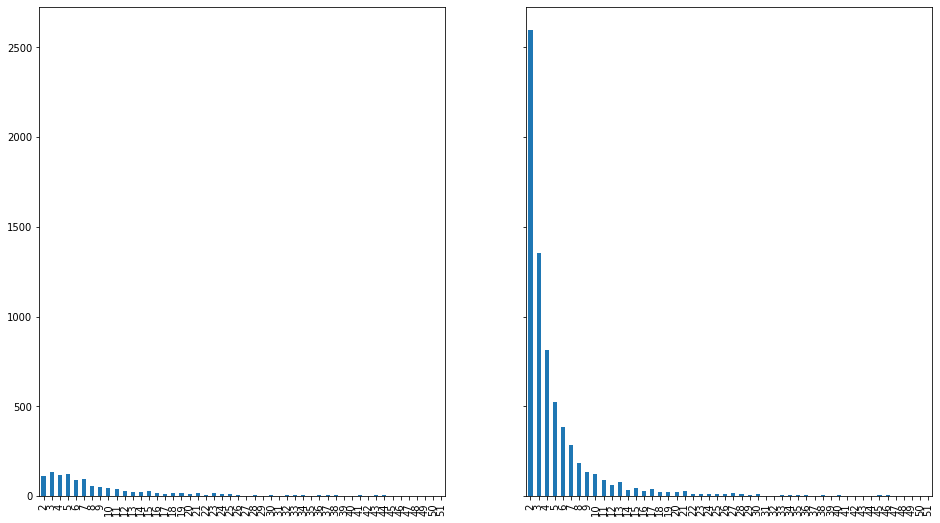

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df_pivot2.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()[:50].plot.bar(figsize=(16,9), ax=ax1)
df_pivot.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()[:50].plot.bar(figsize=(16,9), ax=ax2)
plt.show()

In [152]:
df_pivot.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()

2       2596
3       1352
4        811
5        524
6        384
        ... 
333        1
375        1
492        1
493        1
1584       1
Name: All, Length: 106, dtype: int64

## 데이터 Export

In [157]:
df.to_json("TA_User_Review_Seoul_all_v2.json", orient="records")

In [165]:
d = {"locale":"ko","localeResources":{"ko":{"translation":{"home":"홈","feed":"소식","emptyFeed":"소식","menu":"메뉴","emptyMenu":"메뉴","review":"리뷰","photo":"사진","location":"지도","around":"주변","amusement":"즐길거리","room":"객실","price":"가격","stylist":"스타일리스트","style":"시술","styleinfo":"시술정보","shoppingProduction":"상품","oilPrice":"유가정보","ticket":"티켓","ncr":"공연·행사","innerBusiness":"내부시설","booking":"예약","emptyBooking":"예약","booking_room":"객실 예약","booking_ticket":"예매","navi_start":"출발","navi_destination":"도착","blog":"블로그","blog_review":"블로그리뷰","also_searched_place":"함께 많이 찾아본 곳","related_link":"관련 링크","naver_search_link":"통합검색 결과보기","order":"주문","orderer":"주문자","orderer_review":"주문자{{separator}}리뷰","booking_review":"예약자 리뷰","customer":"예약자","customer_review":"예약자{{separator}}리뷰","book_and_order":"예약·주문","book_and_order_review":"예약·주문 리뷰","booking_and_qna":"예약 및 이용 안내","bookmark":"저장하기","route":"길찾기","share":"공유","address":"주소","qna":"문의","road_address":"도로명","old_address":"지번","clipboard":"복사","map":"지도","navigation":"내비게이션","roadview":"거리뷰","show_map":"지도보기","show_list":"목록보기","show_more":"더보기","services":"일반예약상품","review_photos":"예약자 사진","less":"접기","saved":"저장됨","save":"저장","transit":"대중교통","car":"자동차","walk":"도보","prev":"이전","next":"다음","booking_pickup":"포장예약","delivery":"배달","delivery_preparing":"배달준비중","delivery_closed":"배달종료","standard":"기본","call":"전화","details":"소개","unfold":"펼쳐보기","menu_table":"가격표","view_images":"이미지로 보기","free":"무료","page":"페이지","when":"기간","rates":"요금","host":"주최","prices":"가격비교","exhibitions":"전시","event_exhibitions":"전시·행사","event_festival":"축제·행사","visit":"방문","visitor":"방문자","visitor_review":"방문자{{separator}}리뷰","ticketer":"예매자","ticketer_review":"예매자{{separator}}리뷰","nPayPromotion":"N예약 혜택","nDeliveryPromotion":"N배달 혜택","waiting":"대기현황","michelin":"미쉐린 가이드","receipt":"영수증","recentlyBooked":"최근 {{text}}명 예약","krw":"{{text}}원"}}}};
         

In [166]:
d

{'locale': 'ko',
 'localeResources': {'ko': {'translation': {'home': '홈',
    'feed': '소식',
    'emptyFeed': '소식',
    'menu': '메뉴',
    'emptyMenu': '메뉴',
    'review': '리뷰',
    'photo': '사진',
    'location': '지도',
    'around': '주변',
    'amusement': '즐길거리',
    'room': '객실',
    'price': '가격',
    'stylist': '스타일리스트',
    'style': '시술',
    'styleinfo': '시술정보',
    'shoppingProduction': '상품',
    'oilPrice': '유가정보',
    'ticket': '티켓',
    'ncr': '공연·행사',
    'innerBusiness': '내부시설',
    'booking': '예약',
    'emptyBooking': '예약',
    'booking_room': '객실 예약',
    'booking_ticket': '예매',
    'navi_start': '출발',
    'navi_destination': '도착',
    'blog': '블로그',
    'blog_review': '블로그리뷰',
    'also_searched_place': '함께 많이 찾아본 곳',
    'related_link': '관련 링크',
    'naver_search_link': '통합검색 결과보기',
    'order': '주문',
    'orderer': '주문자',
    'orderer_review': '주문자{{separator}}리뷰',
    'booking_review': '예약자 리뷰',
    'customer': '예약자',
    'customer_review': '예약자{{separator}}리뷰',
    'boo

d = '{"$ROOT_QUERY.accessor({\"businessId\":\"1426556908\"})":{"accessor":"","__typename":"Accessor"},"ROOT_QUERY":{"accessor({\"businessId\":\"1426556908\"})":{"type":"id","generated":true,"id":"$ROOT_QUERY.accessor({\"businessId\":\"1426556908\"})","typename":"Accessor"},"recentBooking({\"input\":{\"bookingStatuses\":[\"confirmed\",\"completed\"],\"businessId\":\"1426556908\",\"businessType\":\"restaurant\"}})":null,"restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false})":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false})","typename":"RestaurantDetailResult"},"feeds({\"businessId\":\"1426556908\",\"type\":\"videoFeed\"})":{"type":"id","generated":true,"id":"$ROOT_QUERY.feeds({\"businessId\":\"1426556908\",\"type\":\"videoFeed\"})","typename":"FeedsResult"},"announcements({\"businessId\":\"1426556908\"})":[],"panoramaThumbnail({\"input\":{\"businessId\":\"1426556908\",\"height\":400,\"type\":\"thumbnail\",\"width\":800}})":{"type":"id","generated":true,"id":"$ROOT_QUERY.panoramaThumbnail({\"input\":{\"businessId\":\"1426556908\",\"height\":400,\"type\":\"thumbnail\",\"width\":800}})","typename":"PanoramaThumbnailResult"},"sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}})":[{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0","typename":"SasImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1","typename":"SasImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2","typename":"SasImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3","typename":"SasImage"}]},"RestaurantBase:1426556908":{"id":"1426556908","name":"만리삼구보쌈","dbType":"drt","reviewSettings":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.reviewSettings","typename":"ReviewSettings"},"description":"포장시 3000원할인 \n포장구성- 보쌈김치(족발에도제공) 무김치 된장국 쟁반국수 쌈야채 마늘 쌈장 새우젓","road":"만리시장 건물안으로 쭉 들어오면 보여요","bookingBusinessId":null,"bookingDisplayName":"예약","category":"족발,보쌈","categoryCode":"221504","rcode":"09170108","streetViewUrl":"https:\u002F\u002Fapp.map.naver.com\u002Fpanorama\u002F?id=obrDc3hy70ww2Mn6Tc9utg&holder=place&linkType=1&heading=-77.75&tilt=10","routeUrl":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EB%A7%8C%EB%A6%AC%EC%82%BC%EA%B5%AC%EB%B3%B4%EC%8C%88%3Baddress%5E%3Bcode%5E1426556908%3Blongitude%5E126.963703%3Blatitude%5E37.5513349","virtualPhone":"0507-1311-3953","phone":"02-711-3953","naverBookingUrl":null,"conveniences":null,"microReviews":null,"themes":{"type":"json","json":[]},"menuImages":[{"type":"id","generated":true,"id":"RestaurantBase:1426556908.menuImages.0","typename":"MenuImage"},{"type":"id","generated":true,"id":"RestaurantBase:1426556908.menuImages.1","typename":"MenuImage"}],"menus":[{"type":"id","generated":false,"id":"Menu:1426556908_0","typename":"Menu"},{"type":"id","generated":false,"id":"Menu:1426556908_1","typename":"Menu"},{"type":"id","generated":false,"id":"Menu:1426556908_2","typename":"Menu"},{"type":"id","generated":false,"id":"Menu:1426556908_3","typename":"Menu"},{"type":"id","generated":false,"id":"Menu:1426556908_4","typename":"Menu"},{"type":"id","generated":false,"id":"Menu:1426556908_5","typename":"Menu"}],"images":[{"type":"id","generated":true,"id":"RestaurantBase:1426556908.images.0","typename":"Image"}],"broadcastInfos":null,"detailPath":"\u002Frestaurants\u002Fdetail?id=1426556908&query=%EB%A7%8C%EB%A6%AC%EC%82%BC%EA%B5%AC%EB%B3%B4%EC%8C%88","isKtis":null,"hasOfficialImages":null,"imagesLastModified":null,"imagesLastModifiedDate":null,"talktalkUrl":null,"chatBotUrl":null,"promotionTitle":null,"naverBookingPromotion":null,"zoomLevel":null,"mapUrl":"\u002Frestaurants\u002FdetailMap?id=1426556908","giftCards":null,"staticMapUrl":"https:\u002F\u002Fsimg.pstatic.net\u002Fstatic.map\u002Fv2\u002Fmap\u002Fstaticmap.bin?center=126.963703%2C37.5513349&level=12&dataversion=206.01&caller=naver_mstore&markers=pos%3A126.963703%2037.5513349%7Ctype%3Ac%7Ccolor%3Ablue%7Clabel%3Arestaurant","roadAddress":"서울 용산구 효창원로 270 건물안 만리삼구보쌈","address":"서울 용산구 서계동 260-1 건물안 만리삼구보쌈","cescoCheck":null,"cescoLink":null,"cescofsCheck":null,"cescofsLink":null,"moreBookingReviewsPath":null,"moreUGCReviewsPath":"\u002Frestaurants\u002FfsasReviews?id=1426556908&name=%EB%A7%8C%EB%A6%AC%EC%82%BC%EA%B5%AC%EB%B3%B4%EC%8C%88","moreFsasReviewsPath":null,"morePhotosPath":"\u002Frestaurants\u002Fphotos?id=1426556908","keywords":{"type":"json","json":[]},"reportWrongInfoType":"type2","partnerInfo":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.partnerInfo","typename":"PartnerInfo"},"businessHours":[{"type":"id","generated":true,"id":"RestaurantBase:1426556908.businessHours.0","typename":"BusinessHour"},{"type":"id","generated":true,"id":"RestaurantBase:1426556908.businessHours.1","typename":"BusinessHour"}],"coordinate":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.coordinate","typename":"Coordinate"},"naverBlog":null,"homepages":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.homepages","typename":"Homepage"},"poiInfo":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.poiInfo","typename":"PoiInfo"},"__typename":"RestaurantBase","michelinGuide":null,"bookingAwards":null,"mfds":null,"nPayPromotion":null,"bookingButtonName":null,"menuSource":null,"easyOrder":null,"baemin":null,"yogiyo":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo","typename":"YogiyoData"},"foodSafetyInfo":null,"relatedLinks":[{"type":"id","generated":true,"id":"RestaurantBase:1426556908.relatedLinks.0","typename":"RelatedLink"}],"hasAiCall":null,"isForcedTakeOut":null,"isEasyOrder":null,"takeOut":null,"tableOrder":null,"preOrder":null,"missingInfo":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.missingInfo","typename":"MissingInfo"}},"$RestaurantBase:1426556908.reviewSettings":{"keyword":"(만리삼구보쌈) & (용산구 | 서계동 | 족발 | 보쌈-일반) & \"만리삼구보쌈\"","blog":1,"cafe":1,"__typename":"ReviewSettings"},"RestaurantBase:1426556908.menuImages.0":{"imageUrl":"http:\u002F\u002Fldb.phinf.naver.net\u002F20200127_24\u002F15801135311087imBb_JPEG\u002FYzDLMPuMBNqXbqPfYQDYwKbd.jpg","__typename":"MenuImage"},"RestaurantBase:1426556908.menuImages.1":{"imageUrl":"http:\u002F\u002Fldb.phinf.naver.net\u002F20200221_260\u002F1582259450653qL0cF_JPEG\u002FyNIwO5xbw4evC9-S6JTney3o.jpg","__typename":"MenuImage"},"Menu:1426556908_0":{"priority":0,"name":"보쌈 대","price":"40000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":["http:\u002F\u002Fldb.phinf.naver.net\u002F20200127_103\u002F1580113453818ITT99_JPEG\u002FqwZLbQeD_rOdV8v25pMQK_BP.jpg"]},"id":"1426556908_0","index":0,"__typename":"Menu"},"Menu:1426556908_1":{"priority":1,"name":"보쌈 중","price":"35000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":[]},"id":"1426556908_1","index":1,"__typename":"Menu"},"Menu:1426556908_2":{"priority":2,"name":"보쌈 소","price":"30000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":[]},"id":"1426556908_2","index":2,"__typename":"Menu"},"Menu:1426556908_3":{"priority":3,"name":"쟁반국수 대","price":"12000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":[]},"id":"1426556908_3","index":3,"__typename":"Menu"},"Menu:1426556908_4":{"priority":4,"name":"쟁반국수 중","price":"8000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":[]},"id":"1426556908_4","index":4,"__typename":"Menu"},"Menu:1426556908_5":{"priority":5,"name":"쟁방국수 소","price":"4000","recommend":false,"change":false,"priceType":null,"description":"","images":{"type":"json","json":[]},"id":"1426556908_5","index":5,"__typename":"Menu"},"RestaurantBase:1426556908.images.0":{"origin":"http:\u002F\u002Fldb.phinf.naver.net\u002F20181026_279\u002F1540546721483gKQq1_JPEG\u002F%B0%A1%B0%D4%C0%FC%B0%E6300.jpg","number":null,"infoTitle":"","url":null,"desc":null,"width":300,"height":140,"source":null,"__typename":"Image"},"$RestaurantBase:1426556908.partnerInfo":{"name":"zeropay","useIcon":true,"iconClassName":"partner_1","displayText":"가맹점입니다","useTooltip":true,"tooltipDesc":"제로페이는 30% 소득공제 혜택을 제공하는 오프라인 QR결제 서비스입니다.\n네이버페이 QR결제로 제로페이를 사용해보세요!","linkTitle":"제로페이 홈페이지 바로가기","linkUrl":"https:\u002F\u002Fzeropaysupporters.or.kr\u002F","__typename":"PartnerInfo"},"RestaurantBase:1426556908.businessHours.0":{"index":0,"day":"매일","isDayOff":false,"hourString":"매일 15:00 - 23:00","startTime":"15:00","endTime":"23:00","description":"","__typename":"BusinessHour"},"RestaurantBase:1426556908.businessHours.1":{"index":1,"day":"수요일","isDayOff":true,"hourString":"수요일 휴무","startTime":"00:00","endTime":"00:00","description":"","__typename":"BusinessHour"},"$RestaurantBase:1426556908.coordinate":{"x":126.963703,"y":37.5513349,"mapZoomLevel":8,"__typename":"Coordinate"},"$RestaurantBase:1426556908.homepages":{"etc":[],"repr":null,"__typename":"Homepage"},"$RestaurantBase:1426556908.poiInfo":{"polyline":null,"polygon":null,"__typename":"PoiInfo"},"$RestaurantBase:1426556908.yogiyo.businessHours.actualDeliveryTime.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours":{"actualDeliveryTime":[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.actualDeliveryTime.0","typename":"BizHour"}],"bizHours":[[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.0.0","typename":"BizHour"}],[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.1.0","typename":"BizHour"}],[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.2.0","typename":"BizHour"}],[],[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.4.0","typename":"BizHour"}],[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.5.0","typename":"BizHour"}],[{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.6.0","typename":"BizHour"}]],"__typename":"YogiyoBusinessHours"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.0.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.1.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.2.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.4.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.5.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo.businessHours.bizHours.6.0":{"start":1500,"end":2230,"__typename":"BizHour"},"$RestaurantBase:1426556908.yogiyo":{"businessHours":{"type":"id","generated":true,"id":"$RestaurantBase:1426556908.yogiyo.businessHours","typename":"YogiyoBusinessHours"},"menuGroups":[{"type":"id","generated":false,"id":"YogiyoMenuGroup:1116365","typename":"YogiyoMenuGroup"},{"type":"id","generated":false,"id":"YogiyoMenuGroup:1116367","typename":"YogiyoMenuGroup"}],"discounts":null,"__typename":"YogiyoData"},"YogiyoMenuGroup:1116365":{"order":1,"id":"1116365","name":"메인 메뉴","desc":"사이즈 선택","menus":[{"type":"id","generated":false,"id":"YogiyoMenu:277964_1116365_23228047","typename":"YogiyoMenu"},{"type":"id","generated":false,"id":"YogiyoMenu:277964_1116365_23228050","typename":"YogiyoMenu"}],"__typename":"YogiyoMenuGroup"},"YogiyoMenu:277964_1116365_23228047":{"order":1,"id":"277964_1116365_23228047","catalogId":null,"name":"보쌈＋쟁반국수＋보쌈김치＋된장국＋코카콜라500ml","desc":"","images":{"type":"json","json":[""]},"price":"30000","source":2,"discounts":null,"__typename":"YogiyoMenu"},"YogiyoMenu:277964_1116365_23228050":{"order":4,"id":"277964_1116365_23228050","catalogId":null,"name":"마늘보쌈＋쟁반국수＋보쌈김치＋된장국＋코카콜라500ml","desc":"","images":{"type":"json","json":[""]},"price":"32000","source":2,"discounts":null,"__typename":"YogiyoMenu"},"YogiyoMenuGroup:1116367":{"order":3,"id":"1116367","name":"추가 메뉴","desc":"","menus":[{"type":"id","generated":false,"id":"YogiyoMenu:277964_1116367_8667856","typename":"YogiyoMenu"}],"__typename":"YogiyoMenuGroup"},"YogiyoMenu:277964_1116367_8667856":{"order":0,"id":"277964_1116367_8667856","catalogId":null,"name":"쟁반국수","desc":"","images":{"type":"json","json":["http:\u002F\u002Fldb.phinf.naver.net\u002F20191126_281\u002F1574720501423EdJft_JPEG\u002F%BD%BA%C5%B9_20170911_foodon_fon31001_%C0%EF%B9%DD%B8%B7%B1%B9%BC%F601_1080x640.jpg"]},"price":"12000","source":2,"discounts":null,"__typename":"YogiyoMenu"},"RestaurantBase:1426556908.relatedLinks.0":{"name":"식신","iconName":"siksin","url":"https:\u002F\u002Fwww.siksinhot.com\u002FP\u002F1041470","clickCode":"siksin","__typename":"RelatedLink"},"$RestaurantBase:1426556908.missingInfo":{"isBizHourMissing":false,"isMenuImageMissing":false,"isAccessorMissing":false,"isDescriptionMissing":false,"isConveniencesMissing":true,"needLargeSuggestionBanner":false,"__typename":"MissingInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false})":{"base":{"type":"id","generated":false,"id":"RestaurantBase:1426556908","typename":"RestaurantBase"},"businessStats":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessStats","typename":"BusinessStats"},"parkingLots":[{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.0","typename":"ParkingLot"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.1","typename":"ParkingLot"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.2","typename":"ParkingLot"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.3","typename":"ParkingLot"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.4","typename":"ParkingLot"}],"brandPromotion":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).brandPromotion","typename":"BrandPromotion"},"fsasReviews":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).fsasReviews","typename":"FsasReviewsResult"},"subwayStations":[{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.0","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.1","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.2","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.3","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.4","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.5","typename":"SubwayStation"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.6","typename":"SubwayStation"}],"busStations":[{"type":"id","generated":false,"id":"BusStation:150865","typename":"BusStation"},{"type":"id","generated":false,"id":"BusStation:104417","typename":"BusStation"},{"type":"id","generated":false,"id":"BusStation:104428","typename":"BusStation"},{"type":"id","generated":false,"id":"BusStation:104440","typename":"BusStation"},{"type":"id","generated":false,"id":"BusStation:104386","typename":"BusStation"},{"type":"id","generated":false,"id":"BusStation:104395","typename":"BusStation"}],"bookingReviews":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).bookingReviews","typename":"BookingReviewsResult"},"receiptReviews":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).receiptReviews","typename":"ReceiptReviewsResult"},"datalabPhotos":[],"tvcasts":[],"navercasts":[],"hasFeed":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).hasFeed","typename":"HasFeed"},"shopWindow":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).shopWindow","typename":"ShopWindow"},"bookingItems":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).bookingItems","typename":"BookingItemsResult"},"tabs":[{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.0","typename":"Tab"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.1","typename":"Tab"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.2","typename":"Tab"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.3","typename":"Tab"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.4","typename":"Tab"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.5","typename":"Tab"}],"businessTools":{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools","typename":"BusinessTools"},"__typename":"RestaurantDetailResult"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessStats":{"contexts":null,"daily":null,"age":null,"gender":null,"alsoSearched":null,"lastUpdated":null,"__typename":"BusinessStats"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.0":{"name":"덕산주차장","address":"서울 용산구 서계동","roadAddress":"","description":"","distance":21,"lat":37.5515235,"lng":126.9636766,"placeId":"18716475","category":"주차장-일반","routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EB%8D%95%EC%82%B0%EC%A3%BC%EC%B0%A8%EC%9E%A5%3Baddress%5E%3Bcode%5E18716475%3Blongitude%5E126.9636766%3Blatitude%5E37.5515235","__typename":"ParkingLot"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.1":{"name":"스트레인지파킹룸","address":"서울 용산구 서계동 261-23","roadAddress":"서울 용산구 효창원로110길 4 덕산주차장","description":"","distance":45,"lat":37.5516422,"lng":126.963366,"placeId":"774870020","category":"주차장-일반","routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EC%8A%A4%ED%8A%B8%EB%A0%88%EC%9D%B8%EC%A7%80%ED%8C%8C%ED%82%B9%EB%A3%B8%3Baddress%5E%3Bcode%5E774870020%3Blongitude%5E126.9633660%3Blatitude%5E37.5516422","__typename":"ParkingLot"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.2":{"name":"서계동 공영 주차장","address":"서울 용산구 서계동 276-5","roadAddress":"서울 용산구 효창원로104가길 16 서계공영주차장","description":"","distance":68,"lat":37.5516063,"lng":126.9644007,"placeId":"36022203","category":"공영주차장","routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EC%84%9C%EA%B3%84%EB%8F%99%20%EA%B3%B5%EC%98%81%20%EC%A3%BC%EC%B0%A8%EC%9E%A5%3Baddress%5E%3Bcode%5E36022203%3Blongitude%5E126.9644007%3Blatitude%5E37.5516063","__typename":"ParkingLot"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.3":{"name":"공덕동1-2공영주차장","address":"서울 마포구 공덕동","roadAddress":"","description":"","distance":214,"lat":37.549768,"lng":126.9622812,"placeId":"21185866","category":"공영주차장","routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EA%B3%B5%EB%8D%95%EB%8F%991-2%EA%B3%B5%EC%98%81%EC%A3%BC%EC%B0%A8%EC%9E%A5%3Baddress%5E%3Bcode%5E21185866%3Blongitude%5E126.9622812%3Blatitude%5E37.5497680","__typename":"ParkingLot"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).parkingLots.4":{"name":"손기정체육공원공영주차장","address":"서울 중구 만리동2가 6-1","roadAddress":"서울 중구 손기정로 101 손기정공원","description":"","distance":431,"lat":37.5551031,"lng":126.9648638,"placeId":"21185760","category":"공영주차장","routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eplace%3Bname%5E%EC%86%90%EA%B8%B0%EC%A0%95%EC%B2%B4%EC%9C%A1%EA%B3%B5%EC%9B%90%EA%B3%B5%EC%98%81%EC%A3%BC%EC%B0%A8%EC%9E%A5%3Baddress%5E%3Bcode%5E21185760%3Blongitude%5E126.9648638%3Blatitude%5E37.5551031","__typename":"ParkingLot"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).brandPromotion":{"promotionMobileUrl":null,"promotionType":null,"promotionDetail":null,"promotionSdayOfWeek":null,"brandDirNum":null,"brandPcUrl":null,"promotionPcUrl":null,"promotionImage":null,"promotionEdayOfWeek":null,"brandMobileUrl":null,"promotionEdate":null,"brandLogoImage":null,"brandPhone":null,"sDate":null,"promotionSdate":null,"promotionPlaceImage":null,"promotionDetailColor":null,"eDate":null,"brandTitle":null,"status":null,"__typename":"BrandPromotion"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).fsasReviews":{"total":36,"maxItemCount":36,"items":[{"type":"id","generated":false,"id":"FsasReview:blog_하리네_629298442_[공덕동족발보쌈맛집\u002F용산족발보쌈] 오랜만에 보쌈먹자!... ","typename":"FsasReview"},{"type":"id","generated":false,"id":"FsasReview:blog_박자매_756836671_용산 족발,보쌈 &lt;만리삼구보쌈&gt; 만리시장에서 보쌈 포장해왔어요","typename":"FsasReview"},{"type":"id","generated":false,"id":"FsasReview:blog_JOIE DE VIVRE_2141478895_공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","typename":"FsasReview"}],"__typename":"FsasReviewsResult"},"FsasReview:blog_하리네_629298442_[공덕동족발보쌈맛집\u002F용산족발보쌈] 오랜만에 보쌈먹자!... ":{"name":"하리네","type":"blog","typeName":"블로그","url":"https:\u002F\u002Fm.blog.naver.com\u002Fchqhr1025\u002F221465322605","home":"https:\u002F\u002Fm.blog.naver.com\u002Fchqhr1025","id":"blog_하리네_629298442_[공덕동족발보쌈맛집\u002F용산족발보쌈] 오랜만에 보쌈먹자!... ","title":"[공덕동족발보쌈맛집\u002F용산족발보쌈] 오랜만에 보쌈먹자!... ","rank":"1","contents":"안녕하세요 하리뽀입니다아~~ 오랜만에 보쌈먹구시퍼서 볼일보고 집들어가는길에 보쌈 포장해서 갔어요 ㅎㅎ 저는 포장해갔지만 당연 배달도되십니당 홀두 있어요 ㅎㅎ 포장은 찾아가시기 십분전에만 전화드리면 이롷게... ","bySmartEditor3":false,"hasNaverReservation":false,"thumbnailUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMTRfMjYx\u002FMDAxNTUwMDc3MTA2NTQw.S0YCKeUWMuPlJx7IL-ymvq5oXnzLstZq-F4WlKcMDFQg.Cw0chz12kZenOQdvLPO0rmz3dpBP5M9bHp3aMkQA_xsg.JPEG.chqhr1025\u002FIMG_8362.jpg#900x900","date":"2019.02.14.","thumbnailCount":"11","isOfficial":false,"isRepresentative":null,"profileImageUrl":null,"isVideoThumbnail":null,"__typename":"FsasReview"},"FsasReview:blog_박자매_756836671_용산 족발,보쌈 &lt;만리삼구보쌈&gt; 만리시장에서 보쌈 포장해왔어요":{"name":"박자매","type":"blog","typeName":"블로그","url":"https:\u002F\u002Fm.blog.naver.com\u002Fbe_looved_\u002F221974303110","home":"https:\u002F\u002Fm.blog.naver.com\u002Fbe_looved_","id":"blog_박자매_756836671_용산 족발,보쌈 &lt;만리삼구보쌈&gt; 만리시장에서 보쌈 포장해왔어요","title":"용산 족발,보쌈 &lt;만리삼구보쌈&gt; 만리시장에서 보쌈 포장해왔어요","rank":"2","contents":"용산구에 위치한 만리시장에 숨은 맛집이 있다는 지인의 추천을 받고 만리시장에 다녀왔다. 만리시장은 서울역 뒤편에 50년 넘게 자리를 지키고 있는 전통시장인데 40여개의 점포가 있는 소형 상설시장이라고 한다.... ","bySmartEditor3":false,"hasNaverReservation":false,"thumbnailUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjJfMjY2\u002FMDAxNTkwMTIxOTg5NDIx.dc3omWZ1VP_zUmj4Q4BjtwMCSx39vR1BIaEAi8diiKYg.xosNdOysltB4XsxVy9pVTWsA6Zo1OjREw0WdllSnfbQg.JPEG.be_looved_\u002F1590121989127.jpg#900x666","date":"7일 전","thumbnailCount":"30","isOfficial":false,"isRepresentative":null,"profileImageUrl":null,"isVideoThumbnail":null,"__typename":"FsasReview"},"FsasReview:blog_JOIE DE VIVRE_2141478895_공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요":{"name":"JOIE DE VIVRE","type":"blog","typeName":"블로그","url":"https:\u002F\u002Fm.blog.naver.com\u002Fminsun_87\u002F221972282681","home":"https:\u002F\u002Fm.blog.naver.com\u002Fminsun_87","id":"blog_JOIE DE VIVRE_2141478895_공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","rank":"3","contents":"#공덕동족발 #서계동맛집 #용산보쌈 #용산족발 #만리시장 #공덕동보쌈포장 #공덕동맛집 #한강공원 #보쌈포장 #보쌈맛집 안녕하세요 오늘은 보쌈 맛집 포스팅을 가지고 왔습니다. 보쌈 좋아하시나요!?? 저는 무척... ","bySmartEditor3":false,"hasNaverReservation":false,"thumbnailUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjM4\u002FMDAxNTg5OTgwMTQ1MTY3.FQMdg0j7kJWrI2gzohvsGPH_qm-gPzGh691ckp2f7Fwg.7Pi85Yum76I-9vwwaN0KqVQnNq81PFpGqCGF9eX9dhog.JPEG.minsun_87\u002F1589980142922.jpg#900x505","date":"2020.05.20.","thumbnailCount":"25","isOfficial":false,"isRepresentative":null,"profileImageUrl":null,"isVideoThumbnail":null,"__typename":"FsasReview"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.0":{"no":"4호선","name":"4","type":4,"typeDesc":"서울역 4호선","color":"#2c9ede","station":{"type":"id","generated":false,"id":"SubwayStationInfo:426","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:426":{"id":426,"name":"서울역","lat":37.5530865,"lng":126.9726771,"exitNumber":"15","walkTime":12,"walkingDistance":812,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%84%9C%EC%9A%B8%EC%97%AD%204%ED%98%B8%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9726771%3Blatitude%5E37.5530865","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.1":{"no":"공항철도","name":"공항","type":101,"typeDesc":"서울역 공항철도","color":"#73b6e4","station":{"type":"id","generated":false,"id":"SubwayStationInfo:4001","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:4001":{"id":4001,"name":"서울역","lat":37.5534363,"lng":126.9697762,"exitNumber":"15","walkTime":12,"walkingDistance":812,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%84%9C%EC%9A%B8%EC%97%AD%20%EA%B3%B5%ED%95%AD%EC%B2%A0%EB%8F%84%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9697762%3Blatitude%5E37.5534363","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.2":{"no":"1호선","name":"1","type":1,"typeDesc":"서울역 1호선","color":"#263c96","station":{"type":"id","generated":false,"id":"SubwayStationInfo:133","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:133":{"id":133,"name":"서울역","lat":37.5558548,"lng":126.9722925,"exitNumber":"15","walkTime":12,"walkingDistance":812,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%84%9C%EC%9A%B8%EC%97%AD%201%ED%98%B8%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9722925%3Blatitude%5E37.5558548","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.3":{"no":"경의중앙선","name":"경의중앙","type":104,"typeDesc":"서울역 경의중앙선","color":"#7cc4a5","station":{"type":"id","generated":false,"id":"SubwayStationInfo:1610","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:1610":{"id":1610,"name":"서울역","lat":37.556395,"lng":126.9713451,"exitNumber":"15","walkTime":12,"walkingDistance":812,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%84%9C%EC%9A%B8%EC%97%AD%20%EA%B2%BD%EC%9D%98%EC%A4%91%EC%95%99%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9713451%3Blatitude%5E37.556395","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.4":{"no":"5호선","name":"5","type":5,"typeDesc":"애오개역 5호선","color":"#8936e0","station":{"type":"id","generated":false,"id":"SubwayStationInfo:530","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:530":{"id":530,"name":"애오개","lat":37.5535993,"lng":126.9567561,"exitNumber":"4","walkTime":12,"walkingDistance":824,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%95%A0%EC%98%A4%EA%B0%9C%EC%97%AD%205%ED%98%B8%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9567561%3Blatitude%5E37.5535993","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.5":{"no":"2호선","name":"2","type":2,"typeDesc":"아현역 2호선","color":"#3cb44a","station":{"type":"id","generated":false,"id":"SubwayStationInfo:242","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:242":{"id":242,"name":"아현","lat":37.5573908,"lng":126.9561004,"exitNumber":"3","walkTime":17,"walkingDistance":1147,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%95%84%ED%98%84%EC%97%AD%202%ED%98%B8%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9561004%3Blatitude%5E37.5573908","__typename":"SubwayStationInfo"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).subwayStations.6":{"no":"2호선","name":"2","type":2,"typeDesc":"충정로역 2호선","color":"#3cb44a","station":{"type":"id","generated":false,"id":"SubwayStationInfo:243","typename":"SubwayStationInfo"},"__typename":"SubwayStation"},"SubwayStationInfo:243":{"id":243,"name":"충정로","lat":37.5597491,"lng":126.9644084,"exitNumber":"5","walkTime":19,"walkingDistance":1240,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EC%B6%A9%EC%A0%95%EB%A1%9C%EC%97%AD%202%ED%98%B8%EC%84%A0%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9644084%3Blatitude%5E37.5597491","__typename":"SubwayStationInfo"},"BusStation:150865":{"id":"150865","name":"만리시장입구","displayCode":"03-596","lat":37.5515446,"lng":126.9630144,"walkTime":1,"walkingDistance":38,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%A7%8C%EB%A6%AC%EC%8B%9C%EC%9E%A5%EC%9E%85%EA%B5%AC%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9630144%3Blatitude%5E37.5515446","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:150865.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:150865.innerRoutes.routeType.0":{"type":"3","typeName":"마을","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:703","typename":"InnerRoute"}],"__typename":"RouteType"},"InnerRoute:703":{"id":"703","name":"용산04","__typename":"InnerRoute"},"$BusStation:150865.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:150865.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"BusStation:104417":{"id":"104417","name":"만리동고개","displayCode":"03-227","lat":37.5516967,"lng":126.9628991,"walkTime":1,"walkingDistance":88,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%A7%8C%EB%A6%AC%EB%8F%99%EA%B3%A0%EA%B0%9C%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9628991%3Blatitude%5E37.5516967","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:104417.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:104417.innerRoutes.routeType.0":{"type":"11","typeName":"간선","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:899","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:1438","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:987","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:1169","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:572","typename":"InnerRoute"}],"__typename":"RouteType"},"InnerRoute:899":{"id":"899","name":"173","__typename":"InnerRoute"},"InnerRoute:1438":{"id":"1438","name":"261","__typename":"InnerRoute"},"InnerRoute:987":{"id":"987","name":"463","__typename":"InnerRoute"},"InnerRoute:1169":{"id":"1169","name":"604","__typename":"InnerRoute"},"InnerRoute:572":{"id":"572","name":"N16","__typename":"InnerRoute"},"$BusStation:104417.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:104417.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"BusStation:104428":{"id":"104428","name":"배문중고등학교","displayCode":"03-597","lat":37.5502428,"lng":126.963553,"walkTime":2,"walkingDistance":123,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%B0%B0%EB%AC%B8%EC%A4%91%EA%B3%A0%EB%93%B1%ED%95%99%EA%B5%90%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.963553%3Blatitude%5E37.5502428","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:104428.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:104428.innerRoutes.routeType.0":{"type":"3","typeName":"마을","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:703","typename":"InnerRoute"}],"__typename":"RouteType"},"$BusStation:104428.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:104428.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"BusStation:104440":{"id":"104440","name":"배문중고교","displayCode":"03-699","lat":37.5501175,"lng":126.9636566,"walkTime":2,"walkingDistance":129,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%B0%B0%EB%AC%B8%EC%A4%91%EA%B3%A0%EA%B5%90%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9636566%3Blatitude%5E37.5501175","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:104440.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:104440.innerRoutes.routeType.0":{"type":"3","typeName":"마을","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:703","typename":"InnerRoute"}],"__typename":"RouteType"},"$BusStation:104440.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:104440.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"BusStation:104386":{"id":"104386","name":"만리동고개","displayCode":"14-749","lat":37.5516465,"lng":126.9623113,"walkTime":3,"walkingDistance":170,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%A7%8C%EB%A6%AC%EB%8F%99%EA%B3%A0%EA%B0%9C%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9623113%3Blatitude%5E37.5516465","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:104386.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:104386.innerRoutes.routeType.0":{"type":"3","typeName":"마을","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:1507","typename":"InnerRoute"}],"__typename":"RouteType"},"InnerRoute:1507":{"id":"1507","name":"마포03","__typename":"InnerRoute"},"$BusStation:104386.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:104386.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"BusStation:104395":{"id":"104395","name":"만리동고개","displayCode":"02-101","lat":37.5516834,"lng":126.9624127,"walkTime":3,"walkingDistance":172,"routeUrlMap":"https:\u002F\u002Fm.search.naver.com\u002Fsearch.naver?where=m&query=%EB%B9%A0%EB%A5%B8%EA%B8%B8%EC%B0%BE%EA%B8%B0&nso_path=placeType%5Eplace%3Bname%5E%3Baddress%5E%3Blatitude%5E%3Blongitude%5E%3Bcode%5E%7Ctype%5Eaddress%3Bname%5E%EB%A7%8C%EB%A6%AC%EB%8F%99%EA%B3%A0%EA%B0%9C%3Baddress%5E%3Bcode%5E%3Blongitude%5E126.9624127%3Blatitude%5E37.5516834","innerRoutes":{"type":"id","generated":true,"id":"$BusStation:104395.innerRoutes","typename":"InnerRoutes"},"__typename":"BusStation"},"$BusStation:104395.innerRoutes.routeType.0":{"type":"11","typeName":"간선","innerRoute":[{"type":"id","generated":false,"id":"InnerRoute:899","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:1438","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:987","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:1169","typename":"InnerRoute"},{"type":"id","generated":false,"id":"InnerRoute:572","typename":"InnerRoute"}],"__typename":"RouteType"},"$BusStation:104395.innerRoutes":{"routeType":[{"type":"id","generated":true,"id":"$BusStation:104395.innerRoutes.routeType.0","typename":"RouteType"}],"__typename":"InnerRoutes"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).bookingReviews":{"total":null,"score":null,"__typename":"BookingReviewsResult"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).receiptReviews":{"total":5,"items":[{"type":"id","generated":false,"id":"ReceiptReview:5eccdcda14b27f001169c6c9","typename":"ReceiptReview"},{"type":"id","generated":false,"id":"ReceiptReview:5e38b592bf5d17001050d971","typename":"ReceiptReview"},{"type":"id","generated":false,"id":"ReceiptReview:5d895e6348482c0010fadb72","typename":"ReceiptReview"}],"__typename":"ReceiptReviewsResult"},"ReceiptReview:5eccdcda14b27f001169c6c9":{"id":"5eccdcda14b27f001169c6c9","authorId":"5c6c1a3bad9c24fd42741295","authorImgUrl":null,"authorNickname":"김단비","authorUrl":"https:\u002F\u002Fm.place.naver.com\u002Fmy\u002F5c6c1a3bad9c24fd42741295\u002Freview","rating":4.5,"body":"좋아요!!","thumbnail":null,"imageUrls":{"type":"json","json":[]},"visited":"2020.05.25","tags":{"type":"json","json":["영수증인증"]},"created":"2020-05-26T09:09:46.125Z","visitCount":1,"replyAuthor":null,"replyBody":null,"replyDate":null,"isReviewBlocked":false,"__typename":"ReceiptReview"},"ReceiptReview:5e38b592bf5d17001050d971":{"id":"5e38b592bf5d17001050d971","authorId":"5e1acf288f87a842bc8e0db7","authorImgUrl":null,"authorNickname":"msy****","authorUrl":"https:\u002F\u002Fm.place.naver.com\u002Fmy\u002F5e1acf288f87a842bc8e0db7\u002Freview","rating":3,"body":"맛있어요 ","thumbnail":null,"imageUrls":{"type":"json","json":[]},"visited":"2020.02.02","tags":{"type":"json","json":["영수증인증"]},"created":"2020-02-04T00:06:42.288Z","visitCount":1,"replyAuthor":null,"replyBody":null,"replyDate":null,"isReviewBlocked":false,"__typename":"ReceiptReview"},"ReceiptReview:5d895e6348482c0010fadb72":{"id":"5d895e6348482c0010fadb72","authorId":"5d5c92a98f87a842bc204a58","authorImgUrl":null,"authorNickname":"NINI","authorUrl":"https:\u002F\u002Fm.place.naver.com\u002Fmy\u002F5d5c92a98f87a842bc204a58\u002Freview","rating":5,"body":"좋아요","thumbnail":null,"imageUrls":{"type":"json","json":[]},"visited":"2019.09.24","tags":{"type":"json","json":["영수증인증"]},"created":"2019-09-24T00:08:03.579Z","visitCount":1,"replyAuthor":null,"replyBody":null,"replyDate":null,"isReviewBlocked":false,"__typename":"ReceiptReview"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).hasFeed":{"blogExist":false,"feedExist":false,"__typename":"HasFeed"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).shopWindow":{"typeName":null,"url":null,"itemsFromChannelNo":null,"itemsFromInterlockId":null,"branchNews":null,"__typename":"ShopWindow"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).bookingItems":{"items":null,"__typename":"BookingItemsResult"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.0":{"tabId":"home","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.1":{"tabId":"menu","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.2":{"tabId":"review","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.3":{"tabId":"photo","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.4":{"tabId":"location","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).tabs.5":{"tabId":"around","__typename":"Tab"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools":{"title":"예약, 스마트주문 등의 기능을 사용할 수 있어요","inUse":[{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.inUse.0","typename":"BusinessTool"}],"notInUse":[{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.notInUse.0","typename":"BusinessTool"},{"type":"id","generated":true,"id":"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.notInUse.1","typename":"BusinessTool"}],"__typename":"BusinessTools"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.inUse.0":{"type":"smartCall","title":"스마트콜","countInString":"50만","description":"전화를 대신 받고 응대까지 해드려요!","link":"https:\u002F\u002Ftv.naver.com\u002Fv\u002F2015533","__typename":"BusinessTool"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.notInUse.0":{"type":"smartOrder","title":"스마트주문","countInString":null,"description":"매장 내 주문부터 포장주문까지 편하게","link":"https:\u002F\u002Fpartner.booking.naver.com\u002Forder\u002Fguide","__typename":"BusinessTool"},"$ROOT_QUERY.restaurant({\"deviceType\":\"mobile\",\"id\":\"1426556908\",\"isNx\":false}).businessTools.notInUse.1":{"type":"naverBooking","title":"네이버예약","countInString":null,"description":"실시간 예약관리를 온라인으로 한번에","link":"https:\u002F\u002Fblog.naver.com\u002Fn_bookingmt01\u002F221388650554","__typename":"BusinessTool"},"$ROOT_QUERY.feeds({\"businessId\":\"1426556908\",\"type\":\"videoFeed\"})":{"feeds":[],"__typename":"FeedsResult"},"$ROOT_QUERY.panoramaThumbnail({\"input\":{\"businessId\":\"1426556908\",\"height\":400,\"type\":\"thumbnail\",\"width\":800}})":{"url":"http:\u002F\u002Fapis.naver.com\u002Fplace\u002Fpanorama\u002Fthumbnail\u002F1426556908\u002F3?width=800&height=400&msgpad=1590680034746&md=Nx5R2igwdQnF%2BEwWbjZi%2Bc2CTms%3D","__typename":"PanoramaThumbnailResult"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0":{"relation":"음식","total":386,"items":[{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.0","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.1","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.2","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.3","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.4","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.5","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.6","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.7","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.8","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.9","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.10","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.11","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.12","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.13","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.14","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.15","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.16","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.17","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.18","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.19","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.20","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.21","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.22","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.23","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.24","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.25","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.26","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.27","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.28","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.29","typename":"UgcImage"}],"__typename":"SasImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.0":{"rank":"1","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTIw\u002FMDAxNTYzMjc4MDk3MTkw.rcwJoFpLTZUkHenW5J7sVkDna4EGaRxKfIx-9qnU_Fog.r8u5y1SRgCprODXAI6ZURFwF0k7ZLrd1vzzvhvZBMusg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203954925.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTIw\u002FMDAxNTYzMjc4MDk3MTkw.rcwJoFpLTZUkHenW5J7sVkDna4EGaRxKfIx-9qnU_Fog.r8u5y1SRgCprODXAI6ZURFwF0k7ZLrd1vzzvhvZBMusg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203954925.jpg","text":"진한소스가\n입맛을돋아줄것 같은느낌 .\n슥슥 비벼서 한입 먼저 먹고,","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.1":{"rank":"2","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjU4\u002FMDAxNTYzMjc4MDk4Nzk2.9FOLWBze6r6OSNsX8hLPzKL3B8VPswWBUXeY7fOsuEkg.HJNJ3VPzYRwhAJyGY0rtmZ8WvHdxP-xEIhG0WnszIGwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203954271.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjU4\u002FMDAxNTYzMjc4MDk4Nzk2.9FOLWBze6r6OSNsX8hLPzKL3B8VPswWBUXeY7fOsuEkg.HJNJ3VPzYRwhAJyGY0rtmZ8WvHdxP-xEIhG0WnszIGwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203954271.jpg","text":"진한소스가\n입맛을돋아줄것 같은느낌 .\n슥슥 비벼서 한입 먼저 먹고,","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.2":{"rank":"3","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTkz\u002FMDAxNTYzMjc4MDk2MjQz.6o127rLp1Eq2RJ91nklZjPw9OOWPyrv8VlbuXoCwLW4g.5Kwuqe9NNS5QlJTyAXPsgAwCfwWEKPlynfmc6NlKKPwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203956861.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTkz\u002FMDAxNTYzMjc4MDk2MjQz.6o127rLp1Eq2RJ91nklZjPw9OOWPyrv8VlbuXoCwLW4g.5Kwuqe9NNS5QlJTyAXPsgAwCfwWEKPlynfmc6NlKKPwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203956861.jpg","text":"진한소스가\n입맛을돋아줄것 같은느낌 .\n슥슥 비벼서 한입 먼저 먹고,","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.3":{"rank":"4","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTcg\u002FMDAxNTYzMjc4MDk4NDkz.iW4hpi9yTZzIDbX-ncX2IRATnPDwFjcCkWwKVeQhkqog.o8VrqRtpW_Ye5d0YRGZozM5h2Xh3hr8gg0E6vM6U530g.JPEG.hyoung0224\u002FKakaoTalk_20190716_203953168.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTcg\u002FMDAxNTYzMjc4MDk4NDkz.iW4hpi9yTZzIDbX-ncX2IRATnPDwFjcCkWwKVeQhkqog.o8VrqRtpW_Ye5d0YRGZozM5h2Xh3hr8gg0E6vM6U530g.JPEG.hyoung0224\u002FKakaoTalk_20190716_203953168.jpg","text":"진한소스가\n입맛을돋아줄것 같은느낌 .\n슥슥 비벼서 한입 먼저 먹고,","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.4":{"rank":"5","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfOTEg\u002FMDAxNTYzMjc4MTA0NjAw.V6cGMgkCkWtzigzLVv53ptsVpUKvsZiSdwu4Sc-wnIcg.s8As4kx6AbjO8keAAoWH3KnueDKhf71nuP3Pn17xgdwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203938537.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfOTEg\u002FMDAxNTYzMjc4MTA0NjAw.V6cGMgkCkWtzigzLVv53ptsVpUKvsZiSdwu4Sc-wnIcg.s8As4kx6AbjO8keAAoWH3KnueDKhf71nuP3Pn17xgdwg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203938537.jpg","text":"보기만해도 스르르 녹을것 같은\n부드러운 보쌈고기 -\n보들보들","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.5":{"rank":"6","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjMg\u002FMDAxNTYzMjc4MTAzOTg3.sUgewPht-Y4T7VCucovzFOplrN1KjtzKxi2M3ldnvQ0g.QqGrzv3RkHnoEy8mwkko4I0gIdGfMQvXCmB_9NjDTngg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203941749.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjMg\u002FMDAxNTYzMjc4MTAzOTg3.sUgewPht-Y4T7VCucovzFOplrN1KjtzKxi2M3ldnvQ0g.QqGrzv3RkHnoEy8mwkko4I0gIdGfMQvXCmB_9NjDTngg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203941749.jpg","text":"보쌈에서 빠질수없는 김치 -\n양도 푸짐하고 너무 맛있어요\n다양하게 맛있게 즐길수있는","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.6":{"rank":"7","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTAg\u002FMDAxNTYzMjc4MDk5ODUw.xU9IfNa0SFWO_SteHJzmn8FRvwOKpOq3PzuB2S8Wafog.KBB982Q5rS5HMrBx9YpJLLTvPg8f_qjM7RzSnVQuRqQg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203951113.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTAg\u002FMDAxNTYzMjc4MDk5ODUw.xU9IfNa0SFWO_SteHJzmn8FRvwOKpOq3PzuB2S8Wafog.KBB982Q5rS5HMrBx9YpJLLTvPg8f_qjM7RzSnVQuRqQg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203951113.jpg","text":"크게 한쌈싸서\n먹고 취향껏\n올려서 같이 한입","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.7":{"rank":"8","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTY4\u002FMDAxNTYzMjc4MTAzNDM5.FKUKPGkDD8cmAu4P87UXNkOWfWIcx_8QhKD418qQ51og.khp_YSq_pMOsSO6yRpXuJlTmX9lWfIYISLPlSUF6d_Ag.JPEG.hyoung0224\u002FKakaoTalk_20190716_203939518.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTY4\u002FMDAxNTYzMjc4MTAzNDM5.FKUKPGkDD8cmAu4P87UXNkOWfWIcx_8QhKD418qQ51og.khp_YSq_pMOsSO6yRpXuJlTmX9lWfIYISLPlSUF6d_Ag.JPEG.hyoung0224\u002FKakaoTalk_20190716_203939518.jpg","text":"보쌈에서 빠질수없는 김치 -\n양도 푸짐하고 너무 맛있어요\n다양하게 맛있게 즐길수있는","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.8":{"rank":"9","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfOTkg\u002FMDAxNTYzMjc4MTAwMjk5.FNrbnE3Og6uXHr2Ii-p6OscHdcnAp767R8ybaIzV-dgg.hSQOVYT63jDJKHWBsW0LsiV_-xK3cL1KfSY19IUvy_gg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203948531.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfOTkg\u002FMDAxNTYzMjc4MTAwMjk5.FNrbnE3Og6uXHr2Ii-p6OscHdcnAp767R8ybaIzV-dgg.hSQOVYT63jDJKHWBsW0LsiV_-xK3cL1KfSY19IUvy_gg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203948531.jpg","text":"크게 한쌈싸서\n먹고 취향껏\n올려서 같이 한입","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.9":{"rank":"10","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTg2\u002FMDAxNTYzMjc4MTAwMzA3.Z4_zRXSIKEeHPs7qOWermDD16dtiLjH6scC4M35cXzwg.YHeter1VOBY-93capqRCLFuhA03aY_sVths-ONN5ymQg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203947251.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMTg2\u002FMDAxNTYzMjc4MTAwMzA3.Z4_zRXSIKEeHPs7qOWermDD16dtiLjH6scC4M35cXzwg.YHeter1VOBY-93capqRCLFuhA03aY_sVths-ONN5ymQg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203947251.jpg","text":"크게 한쌈싸서\n먹고 취향껏\n올려서 같이 한입","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.10":{"rank":"11","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjAw\u002FMDAxNTYzMjc4MTA0Mzk3.S4UecVsdBSt-lxo1lSXdUdqeEUhkcuGkcOUs2nIdGEMg.OqlDv4mQnyxAVPHvE-eA3ZRzNIgbFhA8jV8bcvqByOkg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203937410.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjAw\u002FMDAxNTYzMjc4MTA0Mzk3.S4UecVsdBSt-lxo1lSXdUdqeEUhkcuGkcOUs2nIdGEMg.OqlDv4mQnyxAVPHvE-eA3ZRzNIgbFhA8jV8bcvqByOkg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203937410.jpg","text":"센스있는 음식먹은 후 마무리 치실과\n음료는\n공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.11":{"rank":"12","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfODcg\u002FMDAxNTg5OTgyNDk3MjI4.28vQj6FBHutNJlk7eV2Km_zGT73pIgMaGLkRRyVCwoAg.kFRbXQY1Z8euL2BlrmkyzESlfV7h3FgKQf1AQHbdzx0g.JPEG.minsun_87\u002F1589982495911.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfODcg\u002FMDAxNTg5OTgyNDk3MjI4.28vQj6FBHutNJlk7eV2Km_zGT73pIgMaGLkRRyVCwoAg.kFRbXQY1Z8euL2BlrmkyzESlfV7h3FgKQf1AQHbdzx0g.JPEG.minsun_87\u002F1589982495911.jpg","text":"후식은 탄수화물 + 지방 ㅋㅋㅋㅋㅋㅋㅋㅋ\n이상으로 오늘의 맛집, 만리삼구보쌈 이었습니다.\n모두들 건강하시고 코로나도 조심하세요.","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"599","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.12":{"rank":"13","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTc1\u002FMDAxNTgzNzU5ODM5NDkw.oG0jBeLi2UJMmaZMs_ReI_R2ivRcXIa3aol0UixCMgAg.JuOZ8-iL2cJ3xi8lbyucqsy0hHdU8_RFTwgqZzG38Bkg.JPEG.meiluoyin\u002FIMG_0046.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTc1\u002FMDAxNTgzNzU5ODM5NDkw.oG0jBeLi2UJMmaZMs_ReI_R2ivRcXIa3aol0UixCMgAg.JuOZ8-iL2cJ3xi8lbyucqsy0hHdU8_RFTwgqZzG38Bkg.JPEG.meiluoyin\u002FIMG_0046.jpg","text":"저 혼자 다 못먹을 거 같아서 \" 소 (25,000) \" 짜리로\n시켰는데요\n동생이랑 같이 나눠먹으려고","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"449","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.13":{"rank":"14","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTcz\u002FMDAxNTgzNzU5ODQ5NzMx.oGpOfgZSV_97fZR1_TkbvjdSuPh-5f9L5yEEojdKI3sg.QxxH37IQ95DhpX7scTiYwknA4fEcB8PJv7si_iZvtyUg.JPEG.meiluoyin\u002FIMG_0060.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTcz\u002FMDAxNTgzNzU5ODQ5NzMx.oGpOfgZSV_97fZR1_TkbvjdSuPh-5f9L5yEEojdKI3sg.QxxH37IQ95DhpX7scTiYwknA4fEcB8PJv7si_iZvtyUg.JPEG.meiluoyin\u002FIMG_0060.jpg","text":"먹기 전에 한 컷 !!\n뙇신선한 야채도 듬뿍 주셔서\n오랜만에 비타민 보충 팡팡 할 것 같아용 ㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"449","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.14":{"rank":"15","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNTgg\u002FMDAxNTgzNzU5ODQ4NTU3.Ic88vaZM6HZnMTypdSneHrVEAbl4gFoCQR1k2yBWepYg.OnHFC4f2dcSsoIjiRud6nr52Bgqs82EYkzCEcACeCoEg.JPEG.meiluoyin\u002FIMG_0056.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNTgg\u002FMDAxNTgzNzU5ODQ4NTU3.Ic88vaZM6HZnMTypdSneHrVEAbl4gFoCQR1k2yBWepYg.OnHFC4f2dcSsoIjiRud6nr52Bgqs82EYkzCEcACeCoEg.JPEG.meiluoyin\u002FIMG_0056.jpg","text":"먹기 전에 한 컷 !!\n뙇신선한 야채도 듬뿍 주셔서\n오랜만에 비타민 보충 팡팡 할 것 같아용 ㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"449","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.15":{"rank":"16","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fimage.nmv.naver.net\u002Fblog_2020_03_09_785\u002Fd97ec890-6203-11ea-b859-000000004708_01.jpg","originalUrl":"http:\u002F\u002Fimage.nmv.naver.net\u002Fblog_2020_03_09_785\u002Fd97ec890-6203-11ea-b859-000000004708_01.jpg","text":"휘적휘적 ~\n막국수 섞기 !!","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"1280","height":"720","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.16":{"rank":"17","title":"[만리삼구보쌈족발] 용산구 서계동 만리시장 족발 보쌈 맛집 공덕동 족발 배달 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMjE0\u002FMDAxNTUzMDk4MDU2NzA2.taFh5cX0gkaszlDWkTg802LBArBNuoo7qFafV-LU_eog.TNEAXVevLHb2zdaQ_n99QhrkWC7SV1FVBzO2tsGMfOAg.JPEG.dbgudtjr3\u002FIMG_2102.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMjE0\u002FMDAxNTUzMDk4MDU2NzA2.taFh5cX0gkaszlDWkTg802LBArBNuoo7qFafV-LU_eog.TNEAXVevLHb2zdaQ_n99QhrkWC7SV1FVBzO2tsGMfOAg.JPEG.dbgudtjr3\u002FIMG_2102.jpg","text":"족발에 잘 어울리는\n배추김치와 무말랭이","link":"http:\u002F\u002Fblog.naver.com\u002Fdbgudtjr3\u002F221493361790","section":"blog","subsection":"슬로우보이 블로그","width":"1280","height":"853","date":"20190321","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.17":{"rank":"18","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNDUg\u002FMDAxNTgzNzU5ODUwODE1.5Jf35WFr8Ub1ix7CPJG2XfQX-H1wClOYzBn83vNg4v8g.fSMizh1Xwf5J07H6Hf7PMYxnVkeARmEXcpxQ9brXqVYg.JPEG.meiluoyin\u002FIMG_0061.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNDUg\u002FMDAxNTgzNzU5ODUwODE1.5Jf35WFr8Ub1ix7CPJG2XfQX-H1wClOYzBn83vNg4v8g.fSMizh1Xwf5J07H6Hf7PMYxnVkeARmEXcpxQ9brXqVYg.JPEG.meiluoyin\u002FIMG_0061.jpg","text":"신선한 야채도 듬뿍 주셔서\n오랜만에 비타민 보충 팡팡 할 것 같아용 ㅎㅎ된장국도 그릇에 담아서\n전자레인지에 조금 돌리고 나니","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"449","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.18":{"rank":"19","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMjYx\u002FMDAxNTU1ODU0OTczNzYy.zyGSdphc9XdDIN2c8wXvsgRobHBnxA6WDsg6IrQhh7wg.4Rt7PpNuHBSgqNqr-IORmARnm9xeFQFKLoPibdTGoYAg.JPEG.vivid19821\u002FDSC06319.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMjYx\u002FMDAxNTU1ODU0OTczNzYy.zyGSdphc9XdDIN2c8wXvsgRobHBnxA6WDsg6IrQhh7wg.4Rt7PpNuHBSgqNqr-IORmARnm9xeFQFKLoPibdTGoYAg.JPEG.vivid19821\u002FDSC06319.JPG","text":"맛있고 푸짐한 만리삼구보쌈족발 이에요~~\n시원한 된장콩나물국도 주시고 김치 말려있는것도 넘 예쁘구요. 늘 보쌈도 서비스로 조금 주셔서 아이들 먹이기가 좋더라고요^^야들야들 콜라겐 듬뿍 가득한 족발앞다리에요.\n아현동에 족발 배달 되는 맛집 많지만 저는 이제 만리삼구보쌈족발로 정착했답니다^^","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.19":{"rank":"20","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjY2\u002FMDAxNTg5OTgxNjkzMzg1.wUTFrIUDRvRBEScncNYyxXG0umRylH-vyaMEy-2an_Qg.IHPgHs4KdXTcGSCe82-e2dqr-ri_7Jmo14oh43Yblwcg.JPEG.minsun_87\u002F1589981690205.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjY2\u002FMDAxNTg5OTgxNjkzMzg1.wUTFrIUDRvRBEScncNYyxXG0umRylH-vyaMEy-2an_Qg.IHPgHs4KdXTcGSCe82-e2dqr-ri_7Jmo14oh43Yblwcg.JPEG.minsun_87\u002F1589981690205.jpg","text":"지방과 살코기의 조화도 뛰어났어요.\n비율이 너무 안맞으면\n질기고 느끼하고..","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"675","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.20":{"rank":"21","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTM2\u002FMDAxNTU1ODU0OTczOTMx.3eTle9YaJs2E4_XsAr6LeFXscniyXENAsgw4b-pMpJkg.d9KddPCDae6HMql4jh4RdIrsrShXnQ8czskoWJcYknAg.JPEG.vivid19821\u002FDSC06318.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTM2\u002FMDAxNTU1ODU0OTczOTMx.3eTle9YaJs2E4_XsAr6LeFXscniyXENAsgw4b-pMpJkg.d9KddPCDae6HMql4jh4RdIrsrShXnQ8czskoWJcYknAg.JPEG.vivid19821\u002FDSC06318.JPG","text":"전화하고 방문하니 늘 알아서 준비해 주신답니다.\n저는 늘 족발 앞다리 대자를 먹어요. 그게 콜라겐 많아서 맛있거든요 ㅋㅋㅋㅋ\n방문포장하면 족발 앞다리 대자가 35,000원이구 비빔막국수 포함이라 가성비 완전 짱인듯~~♥맛있고 푸짐한 만리삼구보쌈족발 이에요~~","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.21":{"rank":"22","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjI5\u002FMDAxNTg5OTgyODU3NDA0.LKBFT_MAVhB0AEE2htlxt7Hpsc4-uFOxT-G6RFwqZkAg.DxzqDPWrdHNQE3bjo3u4jM5h_tVNCx7Jh0TAg06o9FIg.JPEG.minsun_87\u002F1589982218117.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjI5\u002FMDAxNTg5OTgyODU3NDA0.LKBFT_MAVhB0AEE2htlxt7Hpsc4-uFOxT-G6RFwqZkAg.DxzqDPWrdHNQE3bjo3u4jM5h_tVNCx7Jh0TAg06o9FIg.JPEG.minsun_87\u002F1589982218117.jpg","text":"요렇게 한보쌈 해서 왕♡\n보쌈김치가 맵지않고 감칠맛 나고\n살짝 달짝지근했어요.","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"643","height":"482","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.22":{"rank":"23","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTI0\u002FMDAxNTgzNzU5ODQ3NDQ5.0nIiJ1t9Yals0tmCHMUrykIKtbHjPjbo5s_Ety4Yv4Eg.-eDzBr2msuP8htgB799ZeKAO0paeNxbBSYOuHmgg65Qg.JPEG.meiluoyin\u002FIMG_0055.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTI0\u002FMDAxNTgzNzU5ODQ3NDQ5.0nIiJ1t9Yals0tmCHMUrykIKtbHjPjbo5s_Ety4Yv4Eg.-eDzBr2msuP8htgB799ZeKAO0paeNxbBSYOuHmgg65Qg.JPEG.meiluoyin\u002FIMG_0055.jpg","text":"보기만 해도 행벅해용 ㅎㅎ !!\n얼른 먹어봐야겠어요먹기 전에 한 컷 !!\n뙇","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"450","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.23":{"rank":"24","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMjYz\u002FMDAxNTgzNzU5ODU3MzE0.XlgtFtNs0I79RghI4OSBk0gdcd4lyDj5jyIddDhWaFwg.PzQIvGuDl8nNxQJzU7yPdhRzzuS5DokW2w7VkNp_jhog.JPEG.meiluoyin\u002FIMG_0071.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMjYz\u002FMDAxNTgzNzU5ODU3MzE0.XlgtFtNs0I79RghI4OSBk0gdcd4lyDj5jyIddDhWaFwg.PzQIvGuDl8nNxQJzU7yPdhRzzuS5DokW2w7VkNp_jhog.JPEG.meiluoyin\u002FIMG_0071.jpg","text":"맛있는 김치 !!\n보쌈하면 빠질 수 없는것이\n바로 \"보쌈 김치\" 죠 !!","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"450","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.24":{"rank":"25","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTEx\u002FMDAxNTU1ODU0OTY3NjI2.QJysnV15q_LRkHsu5o-W2DlKneU0d_WSVp_-VY6d6wkg.z1Bdf4Jt8DqKA0ykPhH6_velhCu0rZ240hzp0mbndpIg.JPEG.vivid19821\u002FDSC06320.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTEx\u002FMDAxNTU1ODU0OTY3NjI2.QJysnV15q_LRkHsu5o-W2DlKneU0d_WSVp_-VY6d6wkg.z1Bdf4Jt8DqKA0ykPhH6_velhCu0rZ240hzp0mbndpIg.JPEG.vivid19821\u002FDSC06320.JPG","text":"야들야들 콜라겐 듬뿍 가득한 족발앞다리에요.\n아현동에 족발 배달 되는 맛집 많지만 저는 이제 만리삼구보쌈족발로 정착했답니다^^그리고 매콤새콤달콤한 막국수!!!\n족발과 정말 환상의 궁합이죠.","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.25":{"rank":"26","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfOTYg\u002FMDAxNTgzNzU5ODU5NDYy.0f7h43MmcuDhL2MQf12tMqxMRrhAmHi15JrXSjgR_OMg.8MUyF1QTD2WGz_fPL1LJ3Vyxf95LLgq8kjQMcxGpRsAg.JPEG.meiluoyin\u002FIMG_0067.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfOTYg\u002FMDAxNTgzNzU5ODU5NDYy.0f7h43MmcuDhL2MQf12tMqxMRrhAmHi15JrXSjgR_OMg.8MUyF1QTD2WGz_fPL1LJ3Vyxf95LLgq8kjQMcxGpRsAg.JPEG.meiluoyin\u002FIMG_0067.jpg","text":"김치가 너무 짜지도 않고\n보쌈 김치인 만큼 적당히 달달하면서\n매콤해서 너무 좋았어요 ㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"450","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.26":{"rank":"27","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMjQy\u002FMDAxNTgzNzU5ODQyNzAw.6OOwppUI4D56ex9-Gxmz6_Hw-Cr3SBsMp3QCrIB9Ym4g.YFP9_8Ok30GGtombBoEcaz2kh09VQR3CK4EVVLNcobMg.JPEG.meiluoyin\u002FIMG_0050.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMjQy\u002FMDAxNTgzNzU5ODQyNzAw.6OOwppUI4D56ex9-Gxmz6_Hw-Cr3SBsMp3QCrIB9Ym4g.YFP9_8Ok30GGtombBoEcaz2kh09VQR3CK4EVVLNcobMg.JPEG.meiluoyin\u002FIMG_0050.jpg","text":"막국수도 주셨어용 ㅎㅎ !!양념장 세트 !!\n동생이 좋아하는 마늘도 듬뿍 ~","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"450","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.27":{"rank":"28","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjYw\u002FMDAxNTg5OTgyNDAxMjgz.tw2xhIg5NQXvXqn9NvaMkkqu6IUOX5v0JsMaBHdryMAg.mpoxOvZSVmugZD93lXEZimB3HkhM3M0POmBfguBQqDkg.GIF.minsun_87\u002Fse3_ani_1589982396511_a.gif","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjYw\u002FMDAxNTg5OTgyNDAxMjgz.tw2xhIg5NQXvXqn9NvaMkkqu6IUOX5v0JsMaBHdryMAg.mpoxOvZSVmugZD93lXEZimB3HkhM3M0POmBfguBQqDkg.GIF.minsun_87\u002Fse3_ani_1589982396511_a.gif","text":"막국수도 보고가세요 ㅋㅋㅋ\n막국수를 추가로 주문할걸 그랬어요.\n순식간에 동이 났거든요.","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"500","height":"281","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.28":{"rank":"29","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTQy\u002FMDAxNTg5OTgxNjkzOTg4.ffP-C3_H1QdW0JpLJXwAxvCRkAc3GjkCMNX5OIIEyXMg.lmtBjBW9mBgIVR65OBH56IwCsLd9t6R3vYUgduUQ6eIg.JPEG.minsun_87\u002F1589981690474.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTQy\u002FMDAxNTg5OTgxNjkzOTg4.ffP-C3_H1QdW0JpLJXwAxvCRkAc3GjkCMNX5OIIEyXMg.lmtBjBW9mBgIVR65OBH56IwCsLd9t6R3vYUgduUQ6eIg.JPEG.minsun_87\u002F1589981690474.jpg","text":"지방과 살코기의 조화도 뛰어났어요.\n비율이 너무 안맞으면\n질기고 느끼하고..","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"604","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).0.items.29":{"rank":"30","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTE1\u002FMDAxNTgzNzU5ODUyMDI0.x5-j11PUDrtC1w459J298t936dscbrhlT90OdasPWIwg.T2EyHKqT_VCgAczHS_EsTrOPvB3EIEFjgVey3CGb4r0g.JPEG.meiluoyin\u002FIMG_0066.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTE1\u002FMDAxNTgzNzU5ODUyMDI0.x5-j11PUDrtC1w459J298t936dscbrhlT90OdasPWIwg.T2EyHKqT_VCgAczHS_EsTrOPvB3EIEFjgVey3CGb4r0g.JPEG.meiluoyin\u002FIMG_0066.jpg","text":"된장국도 그릇에 담아서\n전자레인지에 조금 돌리고 나니\n정말 따뜻하고 맛도 쵝오 !!!","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"450","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1":{"relation":"내부","total":25,"items":[{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.0","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.1","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.2","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.3","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.4","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.5","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.6","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.7","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.8","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.9","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.10","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.11","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.12","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.13","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.14","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.15","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.16","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.17","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.18","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.19","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.20","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.21","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.22","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.23","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.24","typename":"UgcImage"}],"__typename":"SasImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.0":{"rank":"1","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTg2\u002FMDAxNTU1ODU0OTc0MDkx.yJNtRwp4Bf7BYRCrBYzMxrVtJ-ceD1mVkY7zhRgSRmcg.gCnB0hVc6ZiMamyctnUobVrxsWV9vq0WYLhjpme9iokg.JPEG.vivid19821\u002FDSC06316.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTg2\u002FMDAxNTU1ODU0OTc0MDkx.yJNtRwp4Bf7BYRCrBYzMxrVtJ-ceD1mVkY7zhRgSRmcg.gCnB0hVc6ZiMamyctnUobVrxsWV9vq0WYLhjpme9iokg.JPEG.vivid19821\u002FDSC06316.JPG","text":"ㅎㅎㅎㅎ 저는 한 2~3개월 전부터 만리삼구보쌈족발 단골이 되었는데 그때 새로 오픈한 가게였나봐요. 족발팔아 벤츠사자 ㅎㅎㅎ 벤츠.. 로망이죠.식당문 활짝 열려있고 매장운영은 오후3시~오후11시까지 하시는듯해요. 주문배달\n#주문전화\n는 02-711-3953 이구요.","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.1":{"rank":"2","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjA4\u002FMDAxNTYzNTQ5MzEzMjMw.vL0dhqPyOMF35dL19M2mFY8rMIPGv7XrV_TnTRVKwwog.za2dWWHQYuN2YMjLoys6zMkHOQp6-f2eURQSUbsfLgog.JPEG.tlagus2\u002FIMG_9781.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjA4\u002FMDAxNTYzNTQ5MzEzMjMw.vL0dhqPyOMF35dL19M2mFY8rMIPGv7XrV_TnTRVKwwog.za2dWWHQYuN2YMjLoys6zMkHOQp6-f2eURQSUbsfLgog.JPEG.tlagus2\u002FIMG_9781.JPG","text":"원산지 표시도 아날로그 감성 멋지게 ㅋㅋㅋㅋㅋㅋ 박아두셨습니다.이렇게 매장 안에서도 먹을 수 있는 공간이 있더라구요!!!! 퇴근하고 시장소울 충만하게 먹고가는 것도 관찮을 것 같아요 ㅋㅋㅋ\n시장이라 안이 시장 느낌일거라 생각했는데 엄청 깔끔하고 시원하고 좋았어요!!","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.2":{"rank":"3","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjYw\u002FMDAxNTYzNTQ5MzEyNzM0.L21ZNglMBoA4Ky4BINcmAca_jGmg0vE_NE--xwmKWDsg.5_r7EaAiOi6oU08YXQMFTUTYHYUn4BAXmGs_BU_yTtYg.JPEG.tlagus2\u002FIMG_9782.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjYw\u002FMDAxNTYzNTQ5MzEyNzM0.L21ZNglMBoA4Ky4BINcmAca_jGmg0vE_NE--xwmKWDsg.5_r7EaAiOi6oU08YXQMFTUTYHYUn4BAXmGs_BU_yTtYg.JPEG.tlagus2\u002FIMG_9782.JPG","text":"원산지 표시도 아날로그 감성 멋지게 ㅋㅋㅋㅋㅋㅋ 박아두셨습니다.이렇게 매장 안에서도 먹을 수 있는 공간이 있더라구요!!!! 퇴근하고 시장소울 충만하게 먹고가는 것도 관찮을 것 같아요 ㅋㅋㅋ\n시장이라 안이 시장 느낌일거라 생각했는데 엄청 깔끔하고 시원하고 좋았어요!!","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.3":{"rank":"4","title":"[만리삼구보쌈족발] 용산구 서계동 만리시장 족발 보쌈 맛집 공덕동 족발 배달 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTI4\u002FMDAxNTUzMDk4MDI1OTIy.jOMglE8WhPCwgoEj59Su2T-3a3FJpA30g-0nCFuBgp8g.UZqyNIaXIO-KeqCmfqD5Wi6MGQnTdcJNNuuDsdPikuog.JPEG.dbgudtjr3\u002FDSC01275.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTI4\u002FMDAxNTUzMDk4MDI1OTIy.jOMglE8WhPCwgoEj59Su2T-3a3FJpA30g-0nCFuBgp8g.UZqyNIaXIO-KeqCmfqD5Wi6MGQnTdcJNNuuDsdPikuog.JPEG.dbgudtjr3\u002FDSC01275.jpg","text":"[만리삼구보쌈족발]\n주소 : 서울 용산구 효창원로 270\n영업 : 15:00 - 23:00만리시장 안에 있는 맛집 만리삼구보쌈족발","link":"http:\u002F\u002Fblog.naver.com\u002Fdbgudtjr3\u002F221493361790","section":"blog","subsection":"슬로우보이 블로그","width":"1280","height":"1280","date":"20190321","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.4":{"rank":"5","title":"드디어 찾은 마포구\u002F용산구\u002F중구 족발 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfMjQg\u002FMDAxNTUyOTAwMDk0NTMw.muGc_aTwDMQndmVZIDe7-V_1cNAYtNntULeNp0OoLj0g.t8JK11s9qgvWgMcJ-YvIPaO-u_slZJLCBRP7klJUbbwg.JPEG.vivid19821\u002FDSC05846.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfMjQg\u002FMDAxNTUyOTAwMDk0NTMw.muGc_aTwDMQndmVZIDe7-V_1cNAYtNntULeNp0OoLj0g.t8JK11s9qgvWgMcJ-YvIPaO-u_slZJLCBRP7klJUbbwg.JPEG.vivid19821\u002FDSC05846.JPG","text":"시장안쪽으로 들어가면 매장이 보여요.","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221491891424","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190319","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.5":{"rank":"6","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjI0\u002FMDAxNTQyODIxNjIzNjAy.HVxf9-W9xdtCezgRgEqf7HOy50AmwO-y5VIgWL55g1Eg.3-Ra2-iJGo8UCry0HopadW8URZ8DeHDfQJK86AtjO3kg.JPEG.iggog3918\u002FDSC_0003.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjI0\u002FMDAxNTQyODIxNjIzNjAy.HVxf9-W9xdtCezgRgEqf7HOy50AmwO-y5VIgWL55g1Eg.3-Ra2-iJGo8UCry0HopadW8URZ8DeHDfQJK86AtjO3kg.JPEG.iggog3918\u002FDSC_0003.JPG","text":"만리삼구 보쌈족발 도착 !!!\n마트 푸트코트는 봤어도\n시장 푸드코트는 처음봐서","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"853","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.6":{"rank":"7","title":"만리삼구보쌈족발, 공덕동 족발 배달음식","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfMTY4\u002FMDAxNTQ2Njc1MTYyMzY1.V7Lm6Ni5dq7_q7Qcg9__JKsfFLanUQJXSnckG--RnwQg.w5lhez8_-IMi4V7TmoyKfekO7VI_ZOAn1u7hLG3ayDsg.JPEG.dudnr456\u002F20190104_203059.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfMTY4\u002FMDAxNTQ2Njc1MTYyMzY1.V7Lm6Ni5dq7_q7Qcg9__JKsfFLanUQJXSnckG--RnwQg.w5lhez8_-IMi4V7TmoyKfekO7VI_ZOAn1u7hLG3ayDsg.JPEG.dudnr456\u002F20190104_203059.jpg","text":"홀은 테이블 2개로 조금 좁았어요.\n배달음식이라 그런 것 같아요.가게 바로 옆에 만리삼구 보쌈족발 관이\n따로 하나 있었는데 불은 꺼져있었어요.","link":"http:\u002F\u002Fblog.naver.com\u002Fdudnr456\u002F221435002840","section":"blog","subsection":"욱이의 럽로그","width":"900","height":"1200","date":"20190105","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.7":{"rank":"8","title":"공덕동족발 공덕동보쌈 용산족발 용산보쌈 서계동맛집 서계동족발 서계동보쌈  만리시장맛집  만리삼구족발보쌈","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDJfNTgg\u002FMDAxNTQzNzE3NDU4NzMz.mZZ5fKAJLB8rEV3tZuRKnGzYQOm4zoy90wz_XkVx-ZIg.-Ksc-qy2DGowTzOsq5XcShYUgOxlpDoWVgwXLuiQBPYg.JPEG.kjy8302\u002F20181201_203259.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDJfNTgg\u002FMDAxNTQzNzE3NDU4NzMz.mZZ5fKAJLB8rEV3tZuRKnGzYQOm4zoy90wz_XkVx-ZIg.-Ksc-qy2DGowTzOsq5XcShYUgOxlpDoWVgwXLuiQBPYg.JPEG.kjy8302\u002F20181201_203259.jpg","text":"기본 메뉴~실내에 테이블이 있어서\n가게 안에서 드실수가 있어요~\n하지만 테이블이 많지 않아서","link":"http:\u002F\u002Fblog.naver.com\u002Fkjy8302\u002F221410573826","section":"blog","subsection":"기분좋은 상상","width":"900","height":"1200","date":"20181202","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.8":{"rank":"9","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMTU3\u002FMDAxNTQyODIxNjYxMjc1.D2a6LBXp7Xn9x3MoKXN_0ssUy34DZ6k17pOr8uFZxsUg.s-UGRnTzryCuFzieNrDq4zejDf5MeH6P7vO3E8KNdxkg.JPEG.iggog3918\u002FDSC_0007.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMTU3\u002FMDAxNTQyODIxNjYxMjc1.D2a6LBXp7Xn9x3MoKXN_0ssUy34DZ6k17pOr8uFZxsUg.s-UGRnTzryCuFzieNrDq4zejDf5MeH6P7vO3E8KNdxkg.JPEG.iggog3918\u002FDSC_0007.JPG","text":"요렇게 별관도 따로 있다는점 !별관에 단체모임 예약이\n굉장히 많은 곳이라고해요!\n이날도 단체모임이 예약되어있어서","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"850","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.9":{"rank":"10","title":"[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjZfMTIg\u002FMDAxNTUzNTQ4MzU4NDg1.xPkrk9QN79pD2dzSIBtQTPYFiE58vG3fnSp8dzMCMrwg.y6fdv5EvU-mlhdgPqWvVLVWffELRu0v6MwBYJWIH3isg.JPEG.tkfkdgo71\u002F_SAM2584.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjZfMTIg\u002FMDAxNTUzNTQ4MzU4NDg1.xPkrk9QN79pD2dzSIBtQTPYFiE58vG3fnSp8dzMCMrwg.y6fdv5EvU-mlhdgPqWvVLVWffELRu0v6MwBYJWIH3isg.JPEG.tkfkdgo71\u002F_SAM2584.JPG","text":"[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小\n무브무브!!!!\n만리시장 입구로 들어가면[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小","link":"http:\u002F\u002Fblog.naver.com\u002Ftkfkdgo71\u002F221499302541","section":"blog","subsection":"혼자하는 블로그","width":"1280","height":"785","date":"20190328","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.10":{"rank":"11","title":"[공덕동 족발\u002F용산 족발\u002F서계동 맛집] 만리시장에 있는 만리삼구보쌈족발 포장해왔어요!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMjQ5\u002FMDAxNTU0NjI1OTY3MTMx.ok7VvubsW7P73oLkCY1sTTbUBmV5MGNFut3CoZJW7mog.Uvt9IW4QCu-jImfnhVjg5X8yrFlG7L9CT0TP74JDhLkg.JPEG.chun870713\u002FIMG_3718.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMjQ5\u002FMDAxNTU0NjI1OTY3MTMx.ok7VvubsW7P73oLkCY1sTTbUBmV5MGNFut3CoZJW7mog.Uvt9IW4QCu-jImfnhVjg5X8yrFlG7L9CT0TP74JDhLkg.JPEG.chun870713\u002FIMG_3718.jpg","text":"시장을 들어가서 쭉 직진하다가\n오른쪽을 보면 바로 위치하고 있는\n만리삼구보쌈족발!","link":"http:\u002F\u002Fblog.naver.com\u002Fchun870713\u002F221507825657","section":"blog","subsection":"뚜리뚜리의 일상블로그","width":"900","height":"1200","date":"20190407","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.11":{"rank":"12","title":"[공덕동 족발]서계동 맛집 만리삼구보쌈족발 다녀왔어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfNDcg\u002FMDAxNTQ5NjY1MDIxMzQ5.8T-8IaX3SNJg3XWF0laQO_R7MzsS0BAcq5riyZ3gOsog.HAV3b0QN_onlVhfdLZdSNf0ikifD6t0qJArVZh6pXJIg.JPEG.ksn5628\u002F5.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfNDcg\u002FMDAxNTQ5NjY1MDIxMzQ5.8T-8IaX3SNJg3XWF0laQO_R7MzsS0BAcq5riyZ3gOsog.HAV3b0QN_onlVhfdLZdSNf0ikifD6t0qJArVZh6pXJIg.JPEG.ksn5628\u002F5.jpg","text":"만리시장 앞에\n엑스배너도\n있으니 찾아가기는","link":"http:\u002F\u002Fblog.naver.com\u002Fksn5628\u002F221461432217","section":"blog","subsection":"밥 먹고 합시다","width":"1280","height":"720","date":"20190209","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.12":{"rank":"13","title":"[만리동 맛집]만리시장에서 만리삼구 보쌈, 족발 포장해 오다-!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMjcx\u002FMDAxNTM4NzQ1OTE4MzYx.gGxCEtK6WoHqYK6XylJJ0FEsktIvQuTkcGtcY2FY4gUg.8PKErmjFamCtzgREpvpSAITBJf-yok6oppbj_5NuPpkg.JPEG.luv_blog\u002F1538745343346.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMjcx\u002FMDAxNTM4NzQ1OTE4MzYx.gGxCEtK6WoHqYK6XylJJ0FEsktIvQuTkcGtcY2FY4gUg.8PKErmjFamCtzgREpvpSAITBJf-yok6oppbj_5NuPpkg.JPEG.luv_blog\u002F1538745343346.jpg","text":"만리시장 내에 앉아서\n쉬거나 먹을 수 있는 쉼터!!조금 기다리니\n제가 주문한 보쌈이 나왔습니다 ㅎㅎㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fluv_blog\u002F221373442553","section":"blog","subsection":"미미모 그리고 뚠뚜니 daily life ♡ `_`","width":"900","height":"675","date":"20181008","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.13":{"rank":"14","title":"공덕동족발-'만리삼구보쌈족발' 배달도 되는 맛집 :)","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfNDgg\u002FMDAxNTQzOTg3MDQyMzkx.IKrrkec328TMgiZEfJ0Bhq17BGoj-wgTxP2uWo5Zc3Mg.uhjQ4L6B4b_YUHUb6OWeUt5-b9DHo7AXoehfyijF_DUg.JPEG.kyumglangg\u002FIMG_7856.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfNDgg\u002FMDAxNTQzOTg3MDQyMzkx.IKrrkec328TMgiZEfJ0Bhq17BGoj-wgTxP2uWo5Zc3Mg.uhjQ4L6B4b_YUHUb6OWeUt5-b9DHo7AXoehfyijF_DUg.JPEG.kyumglangg\u002FIMG_7856.jpg","text":"만리시장이라는 건물안에 있어요~","link":"http:\u002F\u002Fblog.naver.com\u002Fkyumglangg\u002F221412918313","section":"blog","subsection":"D.D:) Dana's Day❤️","width":"900","height":"900","date":"20181205","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.14":{"rank":"15","title":"공덕동족발 공덕동보쌈 용산족발 용산보쌈 서계동맛집 서계동족발 서계동보쌈  만리시장맛집  만리삼구족발보쌈","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDJfMjkx\u002FMDAxNTQzNzE3NDUyNDA3.LOd6qGx4fXiFIB2zLu6Wy8K4EQPsUPyotPsuarw_sJog.I6fjleUptfWGW2T83oZ9e9TieVAssYCfQeufz30aNEwg.JPEG.kjy8302\u002F20181201_203219.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDJfMjkx\u002FMDAxNTQzNzE3NDUyNDA3.LOd6qGx4fXiFIB2zLu6Wy8K4EQPsUPyotPsuarw_sJog.I6fjleUptfWGW2T83oZ9e9TieVAssYCfQeufz30aNEwg.JPEG.kjy8302\u002F20181201_203219.jpg","text":"입구예요~\n사장님이 재밌는 분이실꺼 같네요 ㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fkjy8302\u002F221410573826","section":"blog","subsection":"기분좋은 상상","width":"900","height":"675","date":"20181202","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.15":{"rank":"16","title":"[용산 족발\u002F서계동 맛집] 만리삼구보쌈족발 : 만리시장에 위치한 족발맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjlfMTMw\u002FMDAxNTQzNDkyMDMzNTAz.sH6W_k0tynfCB_dVuDZT6DPRtSwgmOkuteLHaXxjMyYg.wlzrfQx7UG1df0b0cnTuTKWKh9iKss3Lzu4rNJ4oJfMg.JPEG.ynk_1204\u002F20181129173421_IMG_2564.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjlfMTMw\u002FMDAxNTQzNDkyMDMzNTAz.sH6W_k0tynfCB_dVuDZT6DPRtSwgmOkuteLHaXxjMyYg.wlzrfQx7UG1df0b0cnTuTKWKh9iKss3Lzu4rNJ4oJfMg.JPEG.ynk_1204\u002F20181129173421_IMG_2564.JPG","text":"저희가 방문한곳은 만리시장 문 열고 안쪽으로 좀 들어오면 있는\n#만리삼구보쌈족발\n청년 사장님이 운영하는곳이라던데 시장 안에서도 눈에 제법 띄는 곳이었어요!매장 안에는 테이블이 3개정도 있었는데 바로 옆에 별관이라고 회식하기 좋은 단체석도 마련되어 있었습니다","link":"http:\u002F\u002Fblog.naver.com\u002Fynk_1204\u002F221409270699","section":"blog","subsection":"직먹직찍 먹방로그","width":"900","height":"675","date":"20181130","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.16":{"rank":"17","title":"[용산 족발\u002F서계동 맛집] 만리삼구보쌈족발 : 만리시장에 위치한 족발맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMzBfMTIz\u002FMDAxNTQzNTA0OTQwMTQ4.boIq6oJLSUQOtjDii-ODrH0qLIkIcvA-D_wSIg9h6Iog.yQAFg2AzFE_IYha5u-OXJ-6OFy30bMy9rOQZ2TazbVog.JPEG.ynk_1204\u002F20181129162236_IMG_2528.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMzBfMTIz\u002FMDAxNTQzNTA0OTQwMTQ4.boIq6oJLSUQOtjDii-ODrH0qLIkIcvA-D_wSIg9h6Iog.yQAFg2AzFE_IYha5u-OXJ-6OFy30bMy9rOQZ2TazbVog.JPEG.ynk_1204\u002F20181129162236_IMG_2528.JPG","text":"저희가 방문한곳은 만리시장 문 열고 안쪽으로 좀 들어오면 있는\n#만리삼구보쌈족발\n청년 사장님이 운영하는곳이라던데 시장 안에서도 눈에 제법 띄는 곳이었어요!매장 안에는 테이블이 3개정도 있었는데 바로 옆에 별관이라고 회식하기 좋은 단체석도 마련되어 있었습니다","link":"http:\u002F\u002Fblog.naver.com\u002Fynk_1204\u002F221409270699","section":"blog","subsection":"직먹직찍 먹방로그","width":"900","height":"675","date":"20181130","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.17":{"rank":"18","title":"만리삼구보쌈족발, 공덕동 족발 배달음식","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfNyAg\u002FMDAxNTQ2Njc1MTQ2OTQ5.lZIRwvhoa31_AvGg4b0ptJt9JZ7tUPIeF65Cjo-rAcAg.1f3jJ3FQ_qOGKKc9JbYxJvDFtlROYda4irSpMd-IrdYg.JPEG.dudnr456\u002F20190104_195334.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfNyAg\u002FMDAxNTQ2Njc1MTQ2OTQ5.lZIRwvhoa31_AvGg4b0ptJt9JZ7tUPIeF65Cjo-rAcAg.1f3jJ3FQ_qOGKKc9JbYxJvDFtlROYda4irSpMd-IrdYg.JPEG.dudnr456\u002F20190104_195334.jpg","text":"만리 시장 안으로 들어가면 저 멀리 보이네요.\n시장에서 먹는 족발은\n또 다른 맛이지 않을까,,하는 느낌!확실히 보쌈과 족발은 배달음식으로","link":"http:\u002F\u002Fblog.naver.com\u002Fdudnr456\u002F221435002840","section":"blog","subsection":"욱이의 럽로그","width":"900","height":"675","date":"20190105","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.18":{"rank":"19","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMzMg\u002FMDAxNTQyODIxNjUxMjkx.b5wDL92QumZSEsgsu84uJcFY2ko0BDF-66PraCgxmRQg.y_tNnMYzmqKJsIexCGoLU3zA-2IFy3EoEEk7ZHlmX80g.JPEG.iggog3918\u002FDSC_0006.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMzMg\u002FMDAxNTQyODIxNjUxMjkx.b5wDL92QumZSEsgsu84uJcFY2ko0BDF-66PraCgxmRQg.y_tNnMYzmqKJsIexCGoLU3zA-2IFy3EoEEk7ZHlmX80g.JPEG.iggog3918\u002FDSC_0006.JPG","text":"요렇게 별관도 따로 있다는점 !별관에 단체모임 예약이\n굉장히 많은 곳이라고해요!\n이날도 단체모임이 예약되어있어서","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"853","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.19":{"rank":"20","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjUg\u002FMDAxNTQyODIxNjAxNDQ4.OUSpCvUy8AlHlYnkEVf7UUVsem3oi7BkAHMy3KBSYOsg.Qc3t-bdQsydcVblKHAB3CWg3jowXqXX1a8VJdj6svmkg.JPEG.iggog3918\u002FDSC_0001.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjUg\u002FMDAxNTQyODIxNjAxNDQ4.OUSpCvUy8AlHlYnkEVf7UUVsem3oi7BkAHMy3KBSYOsg.Qc3t-bdQsydcVblKHAB3CWg3jowXqXX1a8VJdj6svmkg.JPEG.iggog3918\u002FDSC_0001.JPG","text":"만리삼구 보쌈족발 도착 !!!\n마트 푸트코트는 봤어도\n시장 푸드코트는 처음봐서","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"852","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.20":{"rank":"21","title":"[공덕동족발]정성가득 용산족발집! 서계동맛집'만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMTUz\u002FMDAxNTQ5NjgxMDY3OTEx.v-eve__mfPNqkYUnbr1Eubx2rvxX0cIZHZq0zuxq-p4g.a1LM-YIFJNRiLwPZ-HezpEb5fhlmvA69UmR35rtYG7cg.JPEG.twosuns89\u002F20190207_211153.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMTUz\u002FMDAxNTQ5NjgxMDY3OTEx.v-eve__mfPNqkYUnbr1Eubx2rvxX0cIZHZq0zuxq-p4g.a1LM-YIFJNRiLwPZ-HezpEb5fhlmvA69UmR35rtYG7cg.JPEG.twosuns89\u002F20190207_211153.jpg","text":"게다가 포장가격은 홀에서 먹는것보다 무려\n3000원씩이나 더 저렴했습니다!!\n포장이 어떻게 구성되어있는지도 잘 나와있어서","link":"http:\u002F\u002Fblog.naver.com\u002Ftwosuns89\u002F221461610700","section":"blog","subsection":"♥힐링을 부르는 녀석들♥","width":"900","height":"450","date":"20190209","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.21":{"rank":"22","title":"[만리동 맛집]만리시장에서 만리삼구 보쌈, 족발 포장해 오다-!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMTg5\u002FMDAxNTM4NzQ1OTYxNDE4.8wh29wNEO6MhYv8k1jTzdLGYlCSvnCBKgOuOODgzpoAg.IUyApUm_di756bPVNdFYXazqghxPWD4rNSQEQhWXlUsg.JPEG.luv_blog\u002F1538745874687.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMTg5\u002FMDAxNTM4NzQ1OTYxNDE4.8wh29wNEO6MhYv8k1jTzdLGYlCSvnCBKgOuOODgzpoAg.IUyApUm_di756bPVNdFYXazqghxPWD4rNSQEQhWXlUsg.JPEG.luv_blog\u002F1538745874687.jpg","text":"오늘 저녁 만리삼구 보쌈, 족발에서 정말 맛있게 먹었어요!!\n만리삼구 보쌈족발은 배달도 되고, 포장, 홀 내에서 식사 모두 모두 가능하니\n만리시장 놀러오시면 꼭 드셔보세여 -!","link":"http:\u002F\u002Fblog.naver.com\u002Fluv_blog\u002F221373442553","section":"blog","subsection":"미미모 그리고 뚠뚜니 daily life ♡ `_`","width":"900","height":"1200","date":"20181008","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.22":{"rank":"23","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMTky\u002FMDAxNTQyODIxNTg4NTMy.5wA1VAVdJDTu9Evo4mRV7u6IwZSa96SEBmztVTuYXJcg.SEQz_tt8TOCFQZqhix6gWFawhgNj89_NCjhMmoNs_xog.JPEG.iggog3918\u002FDSC_0054.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMTky\u002FMDAxNTQyODIxNTg4NTMy.5wA1VAVdJDTu9Evo4mRV7u6IwZSa96SEBmztVTuYXJcg.SEQz_tt8TOCFQZqhix6gWFawhgNj89_NCjhMmoNs_xog.JPEG.iggog3918\u002FDSC_0054.JPG","text":"다먹고 나오는길에\n쿠폰까지 챙겨주시는 사장님♥♥가게앞에 배달의민족 리뷰들도\n직접 걸어놓으셨는데","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"853","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.23":{"rank":"24","title":"[공덕동 족발\u002F용산 족발\u002F서계동 맛집] 만리시장에 있는 만리삼구보쌈족발 포장해왔어요!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMzIg\u002FMDAxNTU0NjI1OTY0MTg0.IDqg_s14yE96zeqUJM9GbBFGA1F-35PkgQAftva2jMMg.Yqv4qq5LoisQlUeAaN0VD-Rz-BYprU039mzNS2CBkt8g.JPEG.chun870713\u002FIMG_3723.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMzIg\u002FMDAxNTU0NjI1OTY0MTg0.IDqg_s14yE96zeqUJM9GbBFGA1F-35PkgQAftva2jMMg.Yqv4qq5LoisQlUeAaN0VD-Rz-BYprU039mzNS2CBkt8g.JPEG.chun870713\u002FIMG_3723.jpg","text":"시장을 들어가서 쭉 직진하다가\n오른쪽을 보면 바로 위치하고 있는\n만리삼구보쌈족발!","link":"http:\u002F\u002Fblog.naver.com\u002Fchun870713\u002F221507825657","section":"blog","subsection":"뚜리뚜리의 일상블로그","width":"900","height":"1200","date":"20190407","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).1.items.24":{"rank":"25","title":"[만리동 맛집]만리시장에서 만리삼구 보쌈, 족발 포장해 오다-!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMjQ4\u002FMDAxNTM4NzQ1OTE2OTE5.Iw_XWVDTbIr5e5dxcSrjEuIvXajdWuJJ0t0XiKOG3T8g.qsGx_lm06yM_8_y0y4vZdP-iEjanPdCpI4DZeTmM99Ig.JPEG.luv_blog\u002F1538745342963.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEwMDVfMjQ4\u002FMDAxNTM4NzQ1OTE2OTE5.Iw_XWVDTbIr5e5dxcSrjEuIvXajdWuJJ0t0XiKOG3T8g.qsGx_lm06yM_8_y0y4vZdP-iEjanPdCpI4DZeTmM99Ig.JPEG.luv_blog\u002F1538745342963.jpg","text":"만리시장 내에 앉아서\n쉬거나 먹을 수 있는 쉼터!!","link":"http:\u002F\u002Fblog.naver.com\u002Fluv_blog\u002F221373442553","section":"blog","subsection":"미미모 그리고 뚠뚜니 daily life ♡ `_`","width":"900","height":"675","date":"20181008","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2":{"relation":"외부","total":26,"items":[{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.0","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.1","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.2","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.3","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.4","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.5","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.6","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.7","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.8","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.9","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.10","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.11","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.12","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.13","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.14","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.15","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.16","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.17","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.18","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.19","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.20","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.21","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.22","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.23","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.24","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.25","typename":"UgcImage"}],"__typename":"SasImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.0":{"rank":"1","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTgx\u002FMDAxNTU1ODU0OTc0Mjk0.GNS-aTbK-dCp67zeEJycGLiN6ARqUhB5cnjz_UrJ7lcg.7z0BZrPRYOQ09bnXqlwZIeZu5tO2bsPIRwQ6GMu1raAg.JPEG.vivid19821\u002FDSC06314.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMTgx\u002FMDAxNTU1ODU0OTc0Mjk0.GNS-aTbK-dCp67zeEJycGLiN6ARqUhB5cnjz_UrJ7lcg.7z0BZrPRYOQ09bnXqlwZIeZu5tO2bsPIRwQ6GMu1raAg.JPEG.vivid19821\u002FDSC06314.JPG","text":"우리동네\n#아현동족발배달\n가능한","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.1":{"rank":"2","title":"아현동 족발 배달 가능한 만리삼구보쌈족발 맛있어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMjMw\u002FMDAxNTU1ODU0OTc1MTcy.wyB6OfqxIfOCnhXwMAywUGLCQZdGcHudn4LgqP_TT0Qg.hh1inPogXAOe69wurxmH2YsJ4mTA_Rq-fpmLGy0Zcacg.JPEG.vivid19821\u002FDSC06315.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MjFfMjMw\u002FMDAxNTU1ODU0OTc1MTcy.wyB6OfqxIfOCnhXwMAywUGLCQZdGcHudn4LgqP_TT0Qg.hh1inPogXAOe69wurxmH2YsJ4mTA_Rq-fpmLGy0Zcacg.JPEG.vivid19821\u002FDSC06315.JPG","text":"만리시장 입구에 차를 잠깐 주차하고 들어갑니다. 주말 밤이라 시장이 조용하네요~~","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221537932461","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190515","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.2":{"rank":"3","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTM4\u002FMDAxNTg5OTgwNDQzNjk3.lDuW9Xx8KIImywtR9rRLHqhRKYinnYaneMjiCDla-O0g.0kPdLeGgiJ9Wzo6LcbCbQbkT8kEghZ2HeNB-cwp_ouMg.JPEG.minsun_87\u002F1589980441426.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTM4\u002FMDAxNTg5OTgwNDQzNjk3.lDuW9Xx8KIImywtR9rRLHqhRKYinnYaneMjiCDla-O0g.0kPdLeGgiJ9Wzo6LcbCbQbkT8kEghZ2HeNB-cwp_ouMg.JPEG.minsun_87\u002F1589980441426.jpg","text":"지도만 보고 찾아가기 어려우실 수 있어요.\n사진 보시면\n만리시장 입구로","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"505","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.3":{"rank":"4","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTcy\u002FMDAxNTg5OTgwMzc0NzEy.l53ti8v1OXiw6nyWvY5GMXUXX195MMnitjGtg3Rmlr4g.lPs4razOrTdD_tIOJKi_Z-C1y8S5h4tBY4Gnm9yJGEkg.JPEG.minsun_87\u002F20200517_165139.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTcy\u002FMDAxNTg5OTgwMzc0NzEy.l53ti8v1OXiw6nyWvY5GMXUXX195MMnitjGtg3Rmlr4g.lPs4razOrTdD_tIOJKi_Z-C1y8S5h4tBY4Gnm9yJGEkg.JPEG.minsun_87\u002F20200517_165139.jpg","text":"지도만 보고 찾아가기 어려우실 수 있어요.\n사진 보시면\n만리시장 입구로","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"675","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.4":{"rank":"5","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMzIg\u002FMDAxNTYzNTQ4NjM5OTA1.K3co-L0lhDDUM2sf8btWRp7OCFDVnRZ3zM0rsGpZU9kg.LyXYmM0fz8YXtbxJywz5SinjNPhladuFVcPdRFcY37og.JPEG.tlagus2\u002Foutput_3759513901.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMzIg\u002FMDAxNTYzNTQ4NjM5OTA1.K3co-L0lhDDUM2sf8btWRp7OCFDVnRZ3zM0rsGpZU9kg.LyXYmM0fz8YXtbxJywz5SinjNPhladuFVcPdRFcY37og.JPEG.tlagus2\u002Foutput_3759513901.jpg","text":"만리시장은 지나만 다녀보고 와본적은 없어서\n뭔가 진짜 리얼 시장느낌..만리시장 첫 방문,,,","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.5":{"rank":"6","title":"용산 족발 만리삼구보쌈족발 깔끔한 보쌈으로 중복달임! @만리시장 서계동 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfMjQy\u002FMDAxNTYzNzkwNzY4ODE3.z9WLCsq-DOw9J2gD1ijRLiG39_vwnfZOd8-S-lgl7o8g.jYwxTQkBTHgeL40Di7cs03Gfn4vDKYj2g2dCdxyrIlwg.JPEG.alexj1005\u002FSDC13831.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfMjQy\u002FMDAxNTYzNzkwNzY4ODE3.z9WLCsq-DOw9J2gD1ijRLiG39_vwnfZOd8-S-lgl7o8g.jYwxTQkBTHgeL40Di7cs03Gfn4vDKYj2g2dCdxyrIlwg.JPEG.alexj1005\u002FSDC13831.JPG","text":"만리동 자주 가는데 만리시장 한 번 들렀다.만리시장 내 만리삼구보쌈족발\n배달만 하는 것이 아니라 만리시장 안쪽 마련된 좌석에서 더위 식히며 반주하고 가면 좋겠더라.\n그게 서계동 맛집 아니겠어?","link":"http:\u002F\u002Fblog.naver.com\u002Falexj1005\u002F221593189032","section":"blog","subsection":"SCLABERNIZATION 불펌자(및 저장) 법적 처벌(전례有)","width":"740","height":"555","date":"20190723","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.6":{"rank":"7","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjYx\u002FMDAxNTYzNTUwNTc4NTcx.zzgDY3OGFx7FHoUqLKeujgsTArLy3MWYSnaLM2Yldicg.iHndVHwXjoF9jCB5bs1jzgiuR8loXxpFHmFfmQc6JhYg.GIF.tlagus2\u002F4218880895.gif","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjYx\u002FMDAxNTYzNTUwNTc4NTcx.zzgDY3OGFx7FHoUqLKeujgsTArLy3MWYSnaLM2Yldicg.iHndVHwXjoF9jCB5bs1jzgiuR8loXxpFHmFfmQc6JhYg.GIF.tlagus2\u002F4218880895.gif","text":"만리시장 첫 방문,,,만리시장 입구에 저 노란색 저것이 만리삼구보쌈족발 안내 표지판 같은것~!","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"500","height":"282","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.7":{"rank":"8","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTQ5\u002FMDAxNTYzNTQ4NTEwNzQ5.hb9Wo67JDsEErfJi1XQwcMZSnQlMz3bBBcZxixu15tcg.yP0tZP5z6FKB4VeZpK_8e3ci1uCqmqpkgBSayF2aabsg.JPEG.tlagus2\u002FIMG_9758.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTQ5\u002FMDAxNTYzNTQ4NTEwNzQ5.hb9Wo67JDsEErfJi1XQwcMZSnQlMz3bBBcZxixu15tcg.yP0tZP5z6FKB4VeZpK_8e3ci1uCqmqpkgBSayF2aabsg.JPEG.tlagus2\u002FIMG_9758.JPG","text":"퇴근길,,,,\n빵차가 떠나간다고 생각하니,,\n빵차가 좋아하는 족보세트가 끌리는 밤,,,,","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.8":{"rank":"9","title":"용산 족발 만리삼구보쌈족발 깔끔한 보쌈으로 중복달임! @만리시장 서계동 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfNzAg\u002FMDAxNTYzNzkwNzY4Mjc3.BbIZfIQoTQG41Fy3NjHrwq3BU4DrIS6AKNORvSGkJnkg.nEpi5mu3LTzlai4UtLFTr008AQd3-JOoM6wFZSeMIRIg.JPEG.alexj1005\u002FSDC13830.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfNzAg\u002FMDAxNTYzNzkwNzY4Mjc3.BbIZfIQoTQG41Fy3NjHrwq3BU4DrIS6AKNORvSGkJnkg.nEpi5mu3LTzlai4UtLFTr008AQd3-JOoM6wFZSeMIRIg.JPEG.alexj1005\u002FSDC13830.JPG","text":"만리동 자주 가는데 만리시장 한 번 들렀다.","link":"http:\u002F\u002Fblog.naver.com\u002Falexj1005\u002F221593189032","section":"blog","subsection":"SCLABERNIZATION 불펌자(및 저장) 법적 처벌(전례有)","width":"740","height":"555","date":"20190723","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.9":{"rank":"10","title":"공덕동 족발잘하는집~ 만리삼구보쌈 포장해서 먹어봤어요!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEwMjVfODIg\u002FMDAxNTcxOTg0Mzc4NDM0.ntqNWEoqWcBrquMmc4x2r3LqfvBUndfv0i-PAYgvE8wg.frgkezs7rJSBdHZG8RTpU0MAv1i8tBDsoaK0f-z4geUg.JPEG.lee600923\u002FDSC04274.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEwMjVfODIg\u002FMDAxNTcxOTg0Mzc4NDM0.ntqNWEoqWcBrquMmc4x2r3LqfvBUndfv0i-PAYgvE8wg.frgkezs7rJSBdHZG8RTpU0MAv1i8tBDsoaK0f-z4geUg.JPEG.lee600923\u002FDSC04274.JPG","text":"만리 시장 안에 있는집이라~ 요 간판을 확인하시고 안으로 들어가주세요 :) 주차는 시장 입구에 깜빡이켜고 잠깐 대놓은다음~ 후다다닥 주문한거 찾아왔어요.","link":"http:\u002F\u002Fblog.naver.com\u002Flee600923\u002F221688500978","section":"blog","subsection":"즐겁게 살아보자쿠냥","width":"1280","height":"853","date":"20191026","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.10":{"rank":"11","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTUw\u002FMDAxNTg5OTgwMjAwNjAx.VXu2tI1pzvbBDKuU_hAcwr8jofKg1tavZ2G8hHUFsZgg.SXukhvP6ju6HLQC4r9yIermUL9SF5s1zSL7z5afARgYg.JPEG.minsun_87\u002F1589980198345.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTUw\u002FMDAxNTg5OTgwMjAwNjAx.VXu2tI1pzvbBDKuU_hAcwr8jofKg1tavZ2G8hHUFsZgg.SXukhvP6ju6HLQC4r9yIermUL9SF5s1zSL7z5afARgYg.JPEG.minsun_87\u002F1589980198345.jpg","text":"일단 보쌈 사진보고 가실게요~~..\n윤기 좔좔..\n맛있어보이지 않나요!??","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"505","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.11":{"rank":"12","title":"드디어 찾은 마포구\u002F용산구\u002F중구 족발 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfNTgg\u002FMDAxNTUyOTAwMDk4MDU2.wPr27ltCLQPfY9eMMoL9lgGhg5Z7lfitrJLMnvQgcxsg.bOYQtcJCG3_LhXrBu6rFfrPUjb85WqkQwt0BuH3GM_Mg.JPEG.vivid19821\u002FDSC05845.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfNTgg\u002FMDAxNTUyOTAwMDk4MDU2.wPr27ltCLQPfY9eMMoL9lgGhg5Z7lfitrJLMnvQgcxsg.bOYQtcJCG3_LhXrBu6rFfrPUjb85WqkQwt0BuH3GM_Mg.JPEG.vivid19821\u002FDSC05845.JPG","text":"용산구 서계동\n#만리시장\n안에 위치한","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221491891424","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190319","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.12":{"rank":"13","title":"용산맛집 쫄깃한 만리삼구 보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTYg\u002FMDAxNTI5NDcwMjM0MTQ4.T9muZ95S9s1sCB2yVyne1nHSVQeD9lBFLAI71FVf0wIg.QsWHIQdSY4qJT0k_D0J601DiCxelvujw1BDTkpLOCtAg.JPEG.studioive\u002FDSC05829.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTYg\u002FMDAxNTI5NDcwMjM0MTQ4.T9muZ95S9s1sCB2yVyne1nHSVQeD9lBFLAI71FVf0wIg.QsWHIQdSY4qJT0k_D0J601DiCxelvujw1BDTkpLOCtAg.JPEG.studioive\u002FDSC05829.jpg","text":"쫄깃한 육질 용산맛집\n만리삼구 보쌈족발\n\u003C만리시장 서울역 맛집 추천\u003E","link":"http:\u002F\u002Fblog.naver.com\u002Fstudioive\u002F221302925994","section":"blog","subsection":"스튜디오 아이브","width":"1280","height":"853","date":"20180620","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.13":{"rank":"14","title":"[용산 족발\u002F서계동 맛집] 만리삼구보쌈족발 : 만리시장에 위치한 족발맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjlfMTky\u002FMDAxNTQzNDkyMDIyNzI1.LcCWOc5NTbsNtpINNenp1cFJNrjoReMJTrgd8foatXIg.xWD76N_EZgJina3Rxal35Hvm5NQZNlEPhUgWcUpEzWsg.JPEG.ynk_1204\u002F20181129162030_IMG_2524.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjlfMTky\u002FMDAxNTQzNDkyMDIyNzI1.LcCWOc5NTbsNtpINNenp1cFJNrjoReMJTrgd8foatXIg.xWD76N_EZgJina3Rxal35Hvm5NQZNlEPhUgWcUpEzWsg.JPEG.ynk_1204\u002F20181129162030_IMG_2524.JPG","text":"안녕하세요 직먹직찍입니다!\n용산구에 위치한\n만리시장","link":"http:\u002F\u002Fblog.naver.com\u002Fynk_1204\u002F221409270699","section":"blog","subsection":"직먹직찍 먹방로그","width":"900","height":"1200","date":"20181130","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.14":{"rank":"15","title":"[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjZfMTUx\u002FMDAxNTUzNTQ4MzM4MDg1.liEGtabDGLbGzSvivs1ARtR2LdakMKDRaScaWqaJ3nog.AAhbhL87DKNapgs_G9rPsqXfdXWEUOWmvg2XBorQJg8g.JPEG.tkfkdgo71\u002F_SAM2583.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjZfMTUx\u002FMDAxNTUzNTQ4MzM4MDg1.liEGtabDGLbGzSvivs1ARtR2LdakMKDRaScaWqaJ3nog.AAhbhL87DKNapgs_G9rPsqXfdXWEUOWmvg2XBorQJg8g.JPEG.tkfkdgo71\u002F_SAM2583.JPG","text":"[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小\n만리시장 안에 있는 족발집임\n오픈한지 얼마 안 된 거 같은데도 입소문 타고 있는듯[공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집] 만리삼구보쌈족발 - 보쌈 小","link":"http:\u002F\u002Fblog.naver.com\u002Ftkfkdgo71\u002F221499302541","section":"blog","subsection":"혼자하는 블로그","width":"1280","height":"769","date":"20190328","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.15":{"rank":"16","title":"[공덕동족발]정성가득 용산족발집! 서계동맛집'만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMTk2\u002FMDAxNTQ5NjgxMDU5MjY0.wTi5Jz2VVc-wL5IC1CiHCm8WvVdp9FQbt6r3N6HPlCcg.z6AjQdO7cIaL1RFbwns5EjaNAo620Fqg5JLPOsMN2AMg.JPEG.twosuns89\u002F20190207_211051.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMTk2\u002FMDAxNTQ5NjgxMDU5MjY0.wTi5Jz2VVc-wL5IC1CiHCm8WvVdp9FQbt6r3N6HPlCcg.z6AjQdO7cIaL1RFbwns5EjaNAo620Fqg5JLPOsMN2AMg.JPEG.twosuns89\u002F20190207_211051.jpg","text":"만리시장 맛집!!\n용산족발집으로 알려진\n만리삼구보쌈족발은 만리시장 안쪽에 위치했는데요!!","link":"http:\u002F\u002Fblog.naver.com\u002Ftwosuns89\u002F221461610700","section":"blog","subsection":"♥힐링을 부르는 녀석들♥","width":"900","height":"450","date":"20190209","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.16":{"rank":"17","title":"공덕동족발-'만리삼구보쌈족발' 배달도 되는 맛집 :)","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfMTY4\u002FMDAxNTQzOTg3MDQyMzc3.NZ2SHnmOcJzlK6dy7qc-PyHi-4bO788zY0kDcGBwk40g.uX7u_fTIyLiSCiLjSNWMVWHw9C8SQ8ULdPlvYmIM8pQg.JPEG.kyumglangg\u002FIMG_7857.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfMTY4\u002FMDAxNTQzOTg3MDQyMzc3.NZ2SHnmOcJzlK6dy7qc-PyHi-4bO788zY0kDcGBwk40g.uX7u_fTIyLiSCiLjSNWMVWHw9C8SQ8ULdPlvYmIM8pQg.JPEG.kyumglangg\u002FIMG_7857.jpg","text":"만리시장이라는 건물안에 있어요~가게앞에 걸쳐있길래 찍어봤어요^^\n벤츠꼭사시길^^\n아빠랑 가게에서 보기로했는데","link":"http:\u002F\u002Fblog.naver.com\u002Fkyumglangg\u002F221412918313","section":"blog","subsection":"D.D:) Dana's Day❤️","width":"900","height":"900","date":"20181205","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.17":{"rank":"18","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjY3\u002FMDAxNTQyODIxNjkxMDUx.1P4V3Px_OQHRbrCik3_3nC0Sw_xLRvIb-MzIrmOYsNQg.bHFjBuuyQmJMDveseohyQfVcqeMH5A7-Uo1wDajcjqcg.JPEG.iggog3918\u002FDSC_0009.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfMjY3\u002FMDAxNTQyODIxNjkxMDUx.1P4V3Px_OQHRbrCik3_3nC0Sw_xLRvIb-MzIrmOYsNQg.bHFjBuuyQmJMDveseohyQfVcqeMH5A7-Uo1wDajcjqcg.JPEG.iggog3918\u002FDSC_0009.JPG","text":"애오개역이랑도 가깝고\n공덕역에서도 가까운 만리시장에\n위치하고있었어요!!","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"853","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.18":{"rank":"19","title":"만리삼구보쌈족발, 공덕동 족발 배달음식","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfNDkg\u002FMDAxNTQ2Njc1MTUwMjIy.63uaXS0Z1tTz6BDlGJfALP9XhlLgu40h1xTn0Obfi4wg.BIr0DeiXDW676vUGO0JJJFWkvGOgtM0p7pUt0fJKsZEg.JPEG.dudnr456\u002F20190104_194906.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAxMDVfNDkg\u002FMDAxNTQ2Njc1MTUwMjIy.63uaXS0Z1tTz6BDlGJfALP9XhlLgu40h1xTn0Obfi4wg.BIr0DeiXDW676vUGO0JJJFWkvGOgtM0p7pUt0fJKsZEg.JPEG.dudnr456\u002F20190104_194906.jpg","text":"만리 시장 안으로 들어가면 저 멀리 보이네요.\n시장에서 먹는 족발은\n또 다른 맛이지 않을까,,하는 느낌!확실히 보쌈과 족발은 배달음식으로","link":"http:\u002F\u002Fblog.naver.com\u002Fdudnr456\u002F221435002840","section":"blog","subsection":"욱이의 럽로그","width":"900","height":"675","date":"20190105","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.19":{"rank":"20","title":"[서계동맛집] 포장도 맛있는 보쌈 {만리삼구보쌈족발}","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA1MTNfNTIg\u002FMDAxNTU3NzM2NjcwNTA0.eC4IaJ7eonh2i4XBnj0BVQPZE7XqF44JkK4-XngGWfUg.wRyvCOdAGmmisFCtiQE47F-IiNYnWyHbj8wQ2oiQiGcg.JPEG.dldbrud260\u002F1557736532527.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA1MTNfNTIg\u002FMDAxNTU3NzM2NjcwNTA0.eC4IaJ7eonh2i4XBnj0BVQPZE7XqF44JkK4-XngGWfUg.wRyvCOdAGmmisFCtiQE47F-IiNYnWyHbj8wQ2oiQiGcg.JPEG.dldbrud260\u002F1557736532527.jpg","text":"만리시장 맛집 포스~~~★\n보쌈포장으로 미리 부탁드렸더니~","link":"http:\u002F\u002Fblog.naver.com\u002Fdldbrud260\u002F221536561061","section":"blog","subsection":"두다리 튼튼할때 움직여라!","width":"900","height":"906","date":"20190513","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.20":{"rank":"21","title":"[공덕동 족발]서계동 맛집 만리삼구보쌈족발 다녀왔어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMjAx\u002FMDAxNTQ5NjY1MDI0OTk3.WcztpMdNK_PFr_C8NsuHYVBexUKW8TPfb4-ljp5yJQkg.fHNmQ_RBiweGYG5A-z_SFnyn3i6Ryf7QWrGoFUU0YFwg.JPEG.ksn5628\u002F3.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMjAx\u002FMDAxNTQ5NjY1MDI0OTk3.WcztpMdNK_PFr_C8NsuHYVBexUKW8TPfb4-ljp5yJQkg.fHNmQ_RBiweGYG5A-z_SFnyn3i6Ryf7QWrGoFUU0YFwg.JPEG.ksn5628\u002F3.jpg","text":"서울역에서\n공덕오거리\n가는 만리재길에서","link":"http:\u002F\u002Fblog.naver.com\u002Fksn5628\u002F221461432217","section":"blog","subsection":"밥 먹고 합시다","width":"1280","height":"720","date":"20190209","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.21":{"rank":"22","title":"[공덕동족발]정성가득 용산족발집! 서계동맛집'만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMjQ4\u002FMDAxNTQ5NjgxMDU2Mjgy._WVcimMm2ciW-GJahrO3FJvLQ6rSgMMngrrqgA-4mJog.MroXKAYUBofIfcfbmOA07spKZ6ZJdP8-XfA_EZ4Eqvwg.JPEG.twosuns89\u002F20190207_211401.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAyMDlfMjQ4\u002FMDAxNTQ5NjgxMDU2Mjgy._WVcimMm2ciW-GJahrO3FJvLQ6rSgMMngrrqgA-4mJog.MroXKAYUBofIfcfbmOA07spKZ6ZJdP8-XfA_EZ4Eqvwg.JPEG.twosuns89\u002F20190207_211401.jpg","text":"만리시장 맛집!!\n용산족발집으로 알려진\n만리삼구보쌈족발은 만리시장 안쪽에 위치했는데요!!","link":"http:\u002F\u002Fblog.naver.com\u002Ftwosuns89\u002F221461610700","section":"blog","subsection":"♥힐링을 부르는 녀석들♥","width":"900","height":"450","date":"20190209","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.22":{"rank":"23","title":"[공덕동 족발\u002F용산 족발\u002F서계동 맛집] 만리시장에 있는 만리삼구보쌈족발 포장해왔어요!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMTgg\u002FMDAxNTU0NjI1OTY1MDE2.TFPy-d-zW6LyfP6IC58K7tGlixQoiMmzmLXHtyXui1Yg.RqVytBjKG3nfT7qXn4mdb5WJNVo4Mxq9AY21oM3AyBEg.JPEG.chun870713\u002FIMG_3719.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMTgg\u002FMDAxNTU0NjI1OTY1MDE2.TFPy-d-zW6LyfP6IC58K7tGlixQoiMmzmLXHtyXui1Yg.RqVytBjKG3nfT7qXn4mdb5WJNVo4Mxq9AY21oM3AyBEg.JPEG.chun870713\u002FIMG_3719.jpg","text":"토요일 날씨 엄청 엉망진창이었죠??\n하루 종일 졸린 날씨였잖아요 ㅠㅠ\n그래서인지 막걸리가 당기더라고요","link":"http:\u002F\u002Fblog.naver.com\u002Fchun870713\u002F221507825657","section":"blog","subsection":"뚜리뚜리의 일상블로그","width":"900","height":"674","date":"20190407","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.23":{"rank":"24","title":"[공덕동 족발\u002F용산 족발\u002F서계동 맛집] 만리시장에 있는 만리삼구보쌈족발 포장해왔어요!","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMzAw\u002FMDAxNTU0NjI1OTY0NDA0.r4JEyJSnRD29WdwMsoVigSVlH7lH-fnXn6at-ghyv7Yg.VC-aVlm0bh1bs_93Gl5HPzqvldx99Au-zj64ZwvhO0gg.JPEG.chun870713\u002FIMG_3716.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA0MDdfMzAw\u002FMDAxNTU0NjI1OTY0NDA0.r4JEyJSnRD29WdwMsoVigSVlH7lH-fnXn6at-ghyv7Yg.VC-aVlm0bh1bs_93Gl5HPzqvldx99Au-zj64ZwvhO0gg.JPEG.chun870713\u002FIMG_3716.jpg","text":"토요일 날씨 엄청 엉망진창이었죠??\n하루 종일 졸린 날씨였잖아요 ㅠㅠ\n그래서인지 막걸리가 당기더라고요","link":"http:\u002F\u002Fblog.naver.com\u002Fchun870713\u002F221507825657","section":"blog","subsection":"뚜리뚜리의 일상블로그","width":"900","height":"1200","date":"20190407","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.24":{"rank":"25","title":"용산 :: 존맛★꿀맛★대존맛 공덕동 족발, 보쌈맛집 '만리삼구보쌈족발'","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfNjYg\u002FMDAxNTQyODIxOTUyODUw.1mVNs4WWyXPoeM1UphclAUjDf5Q1qjPlvVUmVwB5CkQg.1OmDICcaAvttMY4Hqc52utxaV0cBJKWEzvtJVKuVclcg.JPEG.iggog3918\u002FDSC_0055.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODExMjJfNjYg\u002FMDAxNTQyODIxOTUyODUw.1mVNs4WWyXPoeM1UphclAUjDf5Q1qjPlvVUmVwB5CkQg.1OmDICcaAvttMY4Hqc52utxaV0cBJKWEzvtJVKuVclcg.JPEG.iggog3918\u002FDSC_0055.JPG","text":"안녕하세요\n아고에욤 :3\n이번에 너무너무 추천하고싶은","link":"http:\u002F\u002Fblog.naver.com\u002Figgog3918\u002F221400998754","section":"blog","subsection":"아고 BLOG","width":"1280","height":"852","date":"20181118","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).2.items.25":{"rank":"26","title":"공덕동족발-'만리삼구보쌈족발' 배달도 되는 맛집 :)","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfNDAg\u002FMDAxNTQzOTg3MDQxODE3.fh_MIOKUlW9FjZpgy_fCo-TY8qZFlUxOXda6RWGbeDwg.9mWAIjcacC96hk19k4rMrhZxR5ZWEvDXrniO9p-dg2Ag.JPEG.kyumglangg\u002FIMG_7854.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODEyMDVfNDAg\u002FMDAxNTQzOTg3MDQxODE3.fh_MIOKUlW9FjZpgy_fCo-TY8qZFlUxOXda6RWGbeDwg.9mWAIjcacC96hk19k4rMrhZxR5ZWEvDXrniO9p-dg2Ag.JPEG.kyumglangg\u002FIMG_7854.jpg","text":"산구 서계동 260-1\n전화번호 : 02-711-3953\n오픈시간 : 15시-23시","link":"http:\u002F\u002Fblog.naver.com\u002Fkyumglangg\u002F221412918313","section":"blog","subsection":"D.D:) Dana's Day❤️","width":"900","height":"900","date":"20181205","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3":{"relation":"메뉴판","total":99,"items":[{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.0","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.1","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.2","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.3","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.4","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.5","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.6","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.7","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.8","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.9","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.10","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.11","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.12","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.13","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.14","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.15","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.16","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.17","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.18","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.19","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.20","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.21","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.22","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.23","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.24","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.25","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.26","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.27","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.28","typename":"UgcImage"},{"type":"id","generated":true,"id":"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.29","typename":"UgcImage"}],"__typename":"SasImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.0":{"rank":"1","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjc1\u002FMDAxNTg5OTgwNDcxMzMz.3hIioPltPFIVCRe2OP7oYqMH1CUgWFQDrGx_zmRs3TYg.afAQaakPmhedX2M820I4tofdPeOa85FASVgq1slSCLUg.JPEG.minsun_87\u002F20200517_165018.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMjc1\u002FMDAxNTg5OTgwNDcxMzMz.3hIioPltPFIVCRe2OP7oYqMH1CUgWFQDrGx_zmRs3TYg.afAQaakPmhedX2M820I4tofdPeOa85FASVgq1slSCLUg.JPEG.minsun_87\u002F20200517_165018.jpg","text":"포장할인 해주고 계시니까\n근처 사시는 분들은 포장해다 드세요♡","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"1200","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.1":{"rank":"2","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNjcg\u002FMDAxNTgzNzU5ODM4NDYx.A2sHrqfBqfqmJPO6K4WFbHckdA6qTAi7FmijtCfyO_Eg.2KqTDIHaJ2VwDA6fmxVN9v7_7NKng0XrdScg4cMGKy8g.JPEG.meiluoyin\u002FIMG_5294.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfNjcg\u002FMDAxNTgzNzU5ODM4NDYx.A2sHrqfBqfqmJPO6K4WFbHckdA6qTAi7FmijtCfyO_Eg.2KqTDIHaJ2VwDA6fmxVN9v7_7NKng0XrdScg4cMGKy8g.JPEG.meiluoyin\u002FIMG_5294.jpg","text":"드디어 포장 완료 !!\n들고 집으로 룰루랄라 ㅎㅎ짠 ~ !\n집에 오자마자 찍어보았어요 ㅎㅎ","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"338","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.2":{"rank":"3","title":"[용산역맛집] 저렴한 가격에 잡내 하나 없는 보쌈을 푸짐하게 !! \u002F포장전문 \"만리삼구 보쌈족발\"","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTIy\u002FMDAxNTgzNzU5ODM2Mzg5.Uf3SyOPmfta28iEn1mmcaXQG_Ni60KlODBmMjq311cAg.HYaOz4WWsYQL5u5f_DEcL310jkNUqUwQSwf97jceuiUg.JPEG.meiluoyin\u002FIMG_5293.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAzMDlfMTIy\u002FMDAxNTgzNzU5ODM2Mzg5.Uf3SyOPmfta28iEn1mmcaXQG_Ni60KlODBmMjq311cAg.HYaOz4WWsYQL5u5f_DEcL310jkNUqUwQSwf97jceuiUg.JPEG.meiluoyin\u002FIMG_5293.jpg","text":"만리삼구보쌈\n서울특별시 용산구 효창원로 270 건물안 만리삼구보쌈\n#보쌈전문","link":"http:\u002F\u002Fblog.naver.com\u002Fmeiluoyin\u002F221845605899","section":"blog","subsection":"Luoning 의 소소한 하루❤️","width":"600","height":"337","date":"20200309","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.3":{"rank":"4","title":"공덕동 족발 포장 맛집 만리삼구보쌈족발 한강에서 한잔했어요","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTI3\u002FMDAxNTg5OTgwNDcyMzc4.DToI1HKflTiDlcU7ySrPUHGzLDbFTDy-9MpvI0rGFQgg.21Kebn7rwpYJIprAxbToA7sesf_pwYM_IEydRr18_KAg.JPEG.minsun_87\u002F20200517_165023.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDA1MjBfMTI3\u002FMDAxNTg5OTgwNDcyMzc4.DToI1HKflTiDlcU7ySrPUHGzLDbFTDy-9MpvI0rGFQgg.21Kebn7rwpYJIprAxbToA7sesf_pwYM_IEydRr18_KAg.JPEG.minsun_87\u002F20200517_165023.jpg","text":"포장할인 해주고 계시니까\n근처 사시는 분들은 포장해다 드세요♡","link":"http:\u002F\u002Fblog.naver.com\u002Fminsun_87\u002F221972282681","section":"blog","subsection":"JOIE DE VIVRE","width":"900","height":"1200","date":"20200520","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.4":{"rank":"5","title":"용산맛집 쫄깃한 만리삼구 보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTYz\u002FMDAxNTI5NDcwMjMzMjI3.xkd5nCUwIjz5RlcVoz4AAO95vJcea95vIfEX0NGxBJQg.7MRK-ZVFeDhuVqur7X90PQfmImQE8d6UxWdASGyahH8g.JPEG.studioive\u002FDSC05823.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTYz\u002FMDAxNTI5NDcwMjMzMjI3.xkd5nCUwIjz5RlcVoz4AAO95vJcea95vIfEX0NGxBJQg.7MRK-ZVFeDhuVqur7X90PQfmImQE8d6UxWdASGyahH8g.JPEG.studioive\u002FDSC05823.jpg","text":"직접 만든\n마늘 소스\n!!","link":"http:\u002F\u002Fblog.naver.com\u002Fstudioive\u002F221302925994","section":"blog","subsection":"스튜디오 아이브","width":"1280","height":"853","date":"20180620","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.5":{"rank":"6","title":"용산맛집 쫄깃한 만리삼구 보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTQg\u002FMDAxNTI5NDcwMjMzODM1._7XDZSCdjdAzn_hM9s9g0C9fJmd6v40D9Zz2RiveSn4g.71uFk-vaQCx4mmNlQxtFfQGOnTCKo9WIyj2zx259Lckg.JPEG.studioive\u002FDSC05825.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTQg\u002FMDAxNTI5NDcwMjMzODM1._7XDZSCdjdAzn_hM9s9g0C9fJmd6v40D9Zz2RiveSn4g.71uFk-vaQCx4mmNlQxtFfQGOnTCKo9WIyj2zx259Lckg.JPEG.studioive\u002FDSC05825.jpg","text":"화려한 반찬들로 압도하지는 않지만 족발 보쌈 딱 순수한 메뉴로만 최상의 맛을 즐기고 싶으신 분들께 추천해요.\n밑반찬들도 중요하지만 메인 메뉴의 퀄리티를 더 중요하게 생각하는 편이라\n정말 만족스럽게 먹고 왔네요.","link":"http:\u002F\u002Fblog.naver.com\u002Fstudioive\u002F221302925994","section":"blog","subsection":"스튜디오 아이브","width":"1280","height":"853","date":"20180620","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.6":{"rank":"7","title":"공덕동 족발 \u002F 용산 족발 \u002F 서계동 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjM4\u002FMDAxNTYzMjc4MDk2NzY0.Gg0UK2XRON4eOM6oOdZBYJl7rvJX_GszmTmf7OgAtiUg.08ZofNnu17CSKx1YfOzuSdSz_n9RdiNuRDf0y-6Lh6Eg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203930963.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MTZfMjM4\u002FMDAxNTYzMjc4MDk2NzY0.Gg0UK2XRON4eOM6oOdZBYJl7rvJX_GszmTmf7OgAtiUg.08ZofNnu17CSKx1YfOzuSdSz_n9RdiNuRDf0y-6Lh6Eg.JPEG.hyoung0224\u002FKakaoTalk_20190716_203930963.jpg","text":"만리삼구보쌈족발\n서울특별시 용산구 효창원로 270\n한가한 평일 낮","link":"http:\u002F\u002Fblog.naver.com\u002Fhyoung0224\u002F221587357335","section":"blog","subsection":"데일리, 일상 *_*","width":"1280","height":"720","date":"20190716","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.7":{"rank":"8","title":"용산맛집 쫄깃한 만리삼구 보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTQ1\u002FMDAxNTI5NDcwMjMzNzI2.lDzHUFCqVpFRzPcBGYYztESeMwTnIQpo4whmG1oubG8g.81eO6vNAHeujQpcuoSvVsOZeKX8_a5-cmWCKkQ3mAJog.JPEG.studioive\u002FDSC05831.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxODA2MjBfMTQ1\u002FMDAxNTI5NDcwMjMzNzI2.lDzHUFCqVpFRzPcBGYYztESeMwTnIQpo4whmG1oubG8g.81eO6vNAHeujQpcuoSvVsOZeKX8_a5-cmWCKkQ3mAJog.JPEG.studioive\u002FDSC05831.jpg","text":"화려한 반찬들로 압도하지는 않지만 족발 보쌈 딱 순수한 메뉴로만 최상의 맛을 즐기고 싶으신 분들께 추천해요.\n밑반찬들도 중요하지만 메인 메뉴의 퀄리티를 더 중요하게 생각하는 편이라\n정말 만족스럽게 먹고 왔네요.","link":"http:\u002F\u002Fblog.naver.com\u002Fstudioive\u002F221302925994","section":"blog","subsection":"스튜디오 아이브","width":"1280","height":"853","date":"20180620","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.8":{"rank":"9","title":"용산 족발 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMTM0\u002FMDAxNTc4NDUzNjEzMTkz.V0R2NUfCJn5odJmG_qhWIyny-h8vPek2jlrJVD5kRYgg.4a7opTLEItnlT1gFrm9FgNgDCwTd0qg4XrjYSMSxM4wg.JPEG.hyunajjj\u002F1578453612002.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMTM0\u002FMDAxNTc4NDUzNjEzMTkz.V0R2NUfCJn5odJmG_qhWIyny-h8vPek2jlrJVD5kRYgg.4a7opTLEItnlT1gFrm9FgNgDCwTd0qg4XrjYSMSxM4wg.JPEG.hyunajjj\u002F1578453612002.jpg","text":"사장님의 마음이 담겨있는 감사 메시지가 있습니다~\n이런 메시지를 보니 먹기전부터 뭔가 좀더 기대감이 커졌던것 같아요^^","link":"http:\u002F\u002Fblog.naver.com\u002Fhyunajjj\u002F221766243563","section":"blog","subsection":"Hello, Trekking :)","width":"900","height":"600","date":"20200110","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.9":{"rank":"10","title":"용산 족발 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMjM3\u002FMDAxNTc4NDU1MDk4ODcy.pEVCEmNQHOHxXzT0U7AR7aRHVXI2Xk6Ul4EJpY5N1Ugg.zcp-cvD8GWF2W4zwsl8kM7a-nDijD4HJMlQSlgATCMAg.JPEG.hyunajjj\u002F1578455096062.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMjM3\u002FMDAxNTc4NDU1MDk4ODcy.pEVCEmNQHOHxXzT0U7AR7aRHVXI2Xk6Ul4EJpY5N1Ugg.zcp-cvD8GWF2W4zwsl8kM7a-nDijD4HJMlQSlgATCMAg.JPEG.hyunajjj\u002F1578455096062.jpg","text":"매주 수요일은 휴일이고\n영업시간은 오후 3시부터 밤 11시 까지입니당^^","link":"http:\u002F\u002Fblog.naver.com\u002Fhyunajjj\u002F221766243563","section":"blog","subsection":"Hello, Trekking :)","width":"900","height":"675","date":"20200110","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.10":{"rank":"11","title":"용산 족발 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfNjQg\u002FMDAxNTc4NDU1MDk2MDg0.LjXcQsuI1kBd4U8ktucYGXxO0ixBoqmBfI3KX4qJU4Mg.Y6oZ8nmzUMDcBhbN7hLMSilgueiMP81xdXbjYdZzRowg.JPEG.hyunajjj\u002F1578455093287.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfNjQg\u002FMDAxNTc4NDU1MDk2MDg0.LjXcQsuI1kBd4U8ktucYGXxO0ixBoqmBfI3KX4qJU4Mg.Y6oZ8nmzUMDcBhbN7hLMSilgueiMP81xdXbjYdZzRowg.JPEG.hyunajjj\u002F1578455093287.jpg","text":"만리삼구보쌈족발\n서울특별시 용산구 서계동 260-1\n서울역 1호선","link":"http:\u002F\u002Fblog.naver.com\u002Fhyunajjj\u002F221766243563","section":"blog","subsection":"Hello, Trekking :)","width":"900","height":"1200","date":"20200110","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.11":{"rank":"12","title":"공덕동 족발,용산 족발,서계동 맛집)만리삼구보쌈.족발~~","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEyMjFfMTkx\u002FMDAxNTc2OTI3MTk3ODYy.pabb2Bffyg7mDM3j-dcbo9-EH_qQPDbR3LDJeJaskXcg.I20RBQT2oiXevR5W9G9Tf6LkbBbo_7Mu-NFbuF3O-Jgg.JPEG.kyful6714\u002FP1010106.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEyMjFfMTkx\u002FMDAxNTc2OTI3MTk3ODYy.pabb2Bffyg7mDM3j-dcbo9-EH_qQPDbR3LDJeJaskXcg.I20RBQT2oiXevR5W9G9Tf6LkbBbo_7Mu-NFbuF3O-Jgg.JPEG.kyful6714\u002FP1010106.JPG","text":"여의도에서 저녁 먹고 공덕동 족발,용산 족발,서계동 맛집)만리삼구보쌈.족발에서 족발 포장하여 테이크아웃해왔어요","link":"http:\u002F\u002Fblog.naver.com\u002Fkyful6714\u002F221745023386","section":"blog","subsection":"김여사","width":"1280","height":"734","date":"20191221","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.12":{"rank":"13","title":"공덕동 족발,용산 족발,서계동 맛집)만리삼구보쌈.족발~~","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEyMjFfMjk2\u002FMDAxNTc2OTI3MzM2NTg3.7X9EUqkCjbDd2gxecx6TeZGmqGGUhCu5UH3bw3c0pfAg.nhJHJn4DUjNt3YG9ltw3hAE_n0vqVTbN61-SIw7TVt0g.JPEG.kyful6714\u002FP1010124.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTEyMjFfMjk2\u002FMDAxNTc2OTI3MzM2NTg3.7X9EUqkCjbDd2gxecx6TeZGmqGGUhCu5UH3bw3c0pfAg.nhJHJn4DUjNt3YG9ltw3hAE_n0vqVTbN61-SIw7TVt0g.JPEG.kyful6714\u002FP1010124.JPG","text":"지인에게 소개해 주고 싶은 족발보쌈 전문점\n공덕동 족발,용산 족발,서계동 맛집)만리삼구보쌈.족발","link":"http:\u002F\u002Fblog.naver.com\u002Fkyful6714\u002F221745023386","section":"blog","subsection":"김여사","width":"871","height":"1280","date":"20191221","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.13":{"rank":"14","title":"용산 족발 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMjgy\u002FMDAxNTc4NDU1MDkzMjgz.Wm7fxB4sVIUrqFr7mulqJU33-zzetgMy4ED2J_T1IWIg.FR8ecJA3LehVVH0CM4wnRs2KL9M_Bn2OsXhjAK-pO2Mg.JPEG.hyunajjj\u002F1578455091073.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAyMDAxMDhfMjgy\u002FMDAxNTc4NDU1MDkzMjgz.Wm7fxB4sVIUrqFr7mulqJU33-zzetgMy4ED2J_T1IWIg.FR8ecJA3LehVVH0CM4wnRs2KL9M_Bn2OsXhjAK-pO2Mg.JPEG.hyunajjj\u002F1578455091073.jpg","text":"만리삼구보쌈족발\n서울특별시 용산구 서계동 260-1\n서울역 1호선","link":"http:\u002F\u002Fblog.naver.com\u002Fhyunajjj\u002F221766243563","section":"blog","subsection":"Hello, Trekking :)","width":"900","height":"675","date":"20200110","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.14":{"rank":"15","title":"드디어 찾은 마포구\u002F용산구\u002F중구 족발 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfMTQz\u002FMDAxNTUyOTAwMTA1Nzk3.YtL8pldaBbclxINkH36KUDX5eMl0bctnk-I9z4BKAasg.3wVeMYKSwbGrlBCdbvm9WQmkJ3qJG12EVDGKzPg5hiEg.JPEG.vivid19821\u002FDSC05852.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfMTQz\u002FMDAxNTUyOTAwMTA1Nzk3.YtL8pldaBbclxINkH36KUDX5eMl0bctnk-I9z4BKAasg.3wVeMYKSwbGrlBCdbvm9WQmkJ3qJG12EVDGKzPg5hiEg.JPEG.vivid19821\u002FDSC05852.JPG","text":"위 가격은 매장식사나 배달가격이니 참고하셔요~~^^포장구성에 꼭 어느사이즈나 동일하게 쟁반국수가 있어요. 너무좋죠?","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221491891424","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190319","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.15":{"rank":"16","title":"[만리삼구보쌈족발] 용산구 서계동 만리시장 족발 보쌈 맛집 공덕동 족발 배달 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTIy\u002FMDAxNTUzMDk4MDMzODE1.kIMFv2kjlfRGOjyHKq8vHUQHYuFDNZ5Ku8JKDeA-PSIg.g-DijC30Js4SsSRYq7uy_dFFapFfu-CR8aI4sMD4fWYg.JPEG.dbgudtjr3\u002FDSC01271.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTIy\u002FMDAxNTUzMDk4MDMzODE1.kIMFv2kjlfRGOjyHKq8vHUQHYuFDNZ5Ku8JKDeA-PSIg.g-DijC30Js4SsSRYq7uy_dFFapFfu-CR8aI4sMD4fWYg.JPEG.dbgudtjr3\u002FDSC01271.jpg","text":"저는 방문 전에 미리 예약하고\n도착하시기 10분 전에 사장님께 전화드렸더니\n바로 가져갈 수 있게 준비해 주셨어요~^^","link":"http:\u002F\u002Fblog.naver.com\u002Fdbgudtjr3\u002F221493361790","section":"blog","subsection":"슬로우보이 블로그","width":"1280","height":"1280","date":"20190321","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.16":{"rank":"17","title":"드디어 찾은 마포구\u002F용산구\u002F중구 족발 맛집 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfNDQg\u002FMDAxNTUyOTAwMTAyMzQz.Y7q_7NeZj8sgQhaQSAtqZkTF0GVUF2ZU84JNxGONv9Qg._Oda_yGfVqqKXGS6gP6Hc8vjZLrdMk2x0GI6iqdgBC4g.JPEG.vivid19821\u002FDSC05850.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMThfNDQg\u002FMDAxNTUyOTAwMTAyMzQz.Y7q_7NeZj8sgQhaQSAtqZkTF0GVUF2ZU84JNxGONv9Qg._Oda_yGfVqqKXGS6gP6Hc8vjZLrdMk2x0GI6iqdgBC4g.JPEG.vivid19821\u002FDSC05850.JPG","text":"위 가격은 매장식사나 배달가격이니 참고하셔요~~^^","link":"http:\u002F\u002Fblog.naver.com\u002Fvivid19821\u002F221491891424","section":"blog","subsection":"아이와 바라보는 세상","width":"1280","height":"960","date":"20190319","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.17":{"rank":"18","title":"[만리삼구보쌈족발] 용산구 서계동 만리시장 족발 보쌈 맛집 공덕동 족발 배달 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTk4\u002FMDAxNTUzMDk4MDI3NjIx.4GwJxJYDZ86IiiYb3A30GZJ3zKNVzp1knap_A9Mmol0g.uEJRclDpX4TZ2vk-Qvis_4fxxSbxApM0cy4gGDXuteQg.JPEG.dbgudtjr3\u002FDSC01268.jpg","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTAzMjFfMTk4\u002FMDAxNTUzMDk4MDI3NjIx.4GwJxJYDZ86IiiYb3A30GZJ3zKNVzp1knap_A9Mmol0g.uEJRclDpX4TZ2vk-Qvis_4fxxSbxApM0cy4gGDXuteQg.JPEG.dbgudtjr3\u002FDSC01268.jpg","text":"만리시장 안에 있는 맛집 만리삼구보쌈족발\n만리시장은 용산구 서계동에 있는 재래시장이에요.\n이번이 두 번째 방문인데 저번에 보쌈 먹어보고","link":"http:\u002F\u002Fblog.naver.com\u002Fdbgudtjr3\u002F221493361790","section":"blog","subsection":"슬로우보이 블로그","width":"1280","height":"853","date":"20190321","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.18":{"rank":"19","title":"용산 족발 만리삼구보쌈족발 깔끔한 보쌈으로 중복달임! @만리시장 서계동 맛집","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfNTEg\u002FMDAxNTYzNzkwNzY5MTUw.dQqtIwBaTnD27E1L49Z5px1elYtwROmdz9fO5XoD6xMg.yrlAWgSmjCC0M3V3wqGH1wCXwudyvo8kd0yuQuxoeRwg.JPEG.alexj1005\u002FSDC13832.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjJfNTEg\u002FMDAxNTYzNzkwNzY5MTUw.dQqtIwBaTnD27E1L49Z5px1elYtwROmdz9fO5XoD6xMg.yrlAWgSmjCC0M3V3wqGH1wCXwudyvo8kd0yuQuxoeRwg.JPEG.alexj1005\u002FSDC13832.JPG","text":"만리시장 내 만리삼구보쌈족발\n배달만 하는 것이 아니라 만리시장 안쪽 마련된 좌석에서 더위 식히며 반주하고 가면 좋겠더라.\n그게 서계동 맛집 아니겠어?용산 족발 만리삼구보쌈족발 배달의민족 배달 가능하고","link":"http:\u002F\u002Fblog.naver.com\u002Falexj1005\u002F221593189032","section":"blog","subsection":"SCLABERNIZATION 불펌자(및 저장) 법적 처벌(전례有)","width":"740","height":"555","date":"20190723","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.19":{"rank":"20","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfNiAg\u002FMDAxNTYzNTQ5MzEzNDQ3.kpUzY3TQCax6xMNy3dpX98_lJw6kXT0RCp34RGnR0b0g.BCjgtPIsn1ANb0VL40IaNKOFm74CKM22H4lglZZt25sg.JPEG.tlagus2\u002FIMG_9780.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfNiAg\u002FMDAxNTYzNTQ5MzEzNDQ3.kpUzY3TQCax6xMNy3dpX98_lJw6kXT0RCp34RGnR0b0g.BCjgtPIsn1ANb0VL40IaNKOFm74CKM22H4lglZZt25sg.JPEG.tlagus2\u002FIMG_9780.JPG","text":"배민 족발 카테고리에서 5위 안에드는 맛집이더라구요 ㅋㅋㅋㅋㅋㅋㅋ\n신뢰팍팍\n사람들이 많이 먹는집 = 맛있는집","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.20":{"rank":"21","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTQg\u002FMDAxNTYzNTQ5MzEyMzc0.ktMc0s1i9F1qsYhbchjUES-K_0J8BUb9RatntJmzvwkg.DvBUirNZlnrTV4FP4im7YIcBU1uVdUSgOP6EU6Q-3fsg.JPEG.tlagus2\u002FIMG_9779.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTQg\u002FMDAxNTYzNTQ5MzEyMzc0.ktMc0s1i9F1qsYhbchjUES-K_0J8BUb9RatntJmzvwkg.DvBUirNZlnrTV4FP4im7YIcBU1uVdUSgOP6EU6Q-3fsg.JPEG.tlagus2\u002FIMG_9779.JPG","text":"이것은 마치 브이로그 감성\n같이 퇴근하고 족발보쌈 사러 가는 느낌~~~~\n이렇게 시장 입구 들어가서 오른쪽으로 꺾으면","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.21":{"rank":"22","title":"공덕동족발::만리삼구보쌈족발에서 보쌈포장 후기","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfNTUg\u002FMDAxNTYxNzMwMjk3NDA4.kcdbN6pk8fDQolgMy-WrE_9HdeXDIi6s89phoOpMmTsg.sU56FBJBAgOZAkn-CQPA9_TwcE6CIsmUjbBfqPVKSPkg.JPEG.kilomet85\u002FSAM_4577.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfNTUg\u002FMDAxNTYxNzMwMjk3NDA4.kcdbN6pk8fDQolgMy-WrE_9HdeXDIi6s89phoOpMmTsg.sU56FBJBAgOZAkn-CQPA9_TwcE6CIsmUjbBfqPVKSPkg.JPEG.kilomet85\u002FSAM_4577.JPG","text":"요기 만리삼구보쌈족발은 포장하면 3000원 할인되고\n거기에 쟁반국수, 콜라, 된장국 등등까지 다 주신답니다+_+\n이러니 포장을 안할수가 없지용~","link":"http:\u002F\u002Fblog.naver.com\u002Fkilomet85\u002F221573282828","section":"blog","subsection":"베리캔디의 달싸한 스토리","width":"740","height":"493","date":"20190704","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.22":{"rank":"23","title":"공덕동족발::만리삼구보쌈족발에서 보쌈포장 후기","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfNjcg\u002FMDAxNTYxNzMwMzAyMjc2.K6xCJ0PhhVK2bsg_VafJfKeAMnmzp7KuiDMc8xQYWW0g.u6qzOuPeOeZavXm_9IaapIbvDWhjp7qL4e40_R7ec50g.JPEG.kilomet85\u002FSAM_4593.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfNjcg\u002FMDAxNTYxNzMwMzAyMjc2.K6xCJ0PhhVK2bsg_VafJfKeAMnmzp7KuiDMc8xQYWW0g.u6qzOuPeOeZavXm_9IaapIbvDWhjp7qL4e40_R7ec50g.JPEG.kilomet85\u002FSAM_4593.JPG","text":"요건 쿠폰!!\n열심히 쿠폰 모아서 보쌈대짜리로 한번 먹어야겠어요~","link":"http:\u002F\u002Fblog.naver.com\u002Fkilomet85\u002F221573282828","section":"blog","subsection":"베리캔디의 달싸한 스토리","width":"740","height":"493","date":"20190704","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.23":{"rank":"24","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjI3\u002FMDAxNTYzNTQ4NTExMDAy.Ckj7L5jonvuIZEMukw_qUaClx6UycexmZAqKSEw8paQg.a6N3RL1jQwrBJavTmhQhwStORJ8aylHEGjmxT2NHwgMg.JPEG.tlagus2\u002FIMG_9757.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjI3\u002FMDAxNTYzNTQ4NTExMDAy.Ckj7L5jonvuIZEMukw_qUaClx6UycexmZAqKSEw8paQg.a6N3RL1jQwrBJavTmhQhwStORJ8aylHEGjmxT2NHwgMg.JPEG.tlagus2\u002FIMG_9757.JPG","text":"만리시장 첫 방문,,,만리시장 입구에 저 노란색 저것이 만리삼구보쌈족발 안내 표지판 같은것~!","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.24":{"rank":"25","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTYy\u002FMDAxNTYzNTQ5MzExODE2.vLKTXp-T6utzplaav7aTOufN9SnU7CfZH4W-eWXXg7cg.huha59aOJb-TX6DRRZ9v7zdz5M-O4hOh5vHtBUg8wX8g.JPEG.tlagus2\u002FIMG_9759.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTYy\u002FMDAxNTYzNTQ5MzExODE2.vLKTXp-T6utzplaav7aTOufN9SnU7CfZH4W-eWXXg7cg.huha59aOJb-TX6DRRZ9v7zdz5M-O4hOh5vHtBUg8wX8g.JPEG.tlagus2\u002FIMG_9759.JPG","text":"리얼 맛집느낌\n오토바이도 너무나 스웩이 넘치구요\n서계동 스타일 서계동맛집 스타일^^!배달의 민족 표시가 있길래 배민에도 들어가 보았습니다 ㅋㅋㅋㅋㅋ 저는 포장하러 왔지만 ㅋㅋㅋㅋ","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.25":{"rank":"26","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjAz\u002FMDAxNTYzNTQ5NTE2NDkx.GHPj7tBg2w4bXopL7NDdQXslvEKXISXBaM3P8BF3fc8g.WQwI--e9Fxsoh5GmVWSb_5BIRE6oaIP1tZ9LHOwW92wg.JPEG.tlagus2\u002FIMG_9735.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMjAz\u002FMDAxNTYzNTQ5NTE2NDkx.GHPj7tBg2w4bXopL7NDdQXslvEKXISXBaM3P8BF3fc8g.WQwI--e9Fxsoh5GmVWSb_5BIRE6oaIP1tZ9LHOwW92wg.JPEG.tlagus2\u002FIMG_9735.JPG","text":"ㅋㅋㅋㅋㅋㅋ그리고 쫀드기랑\n치실도 주신다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n사장님의 귀여운 서비스만리삼구보쌈족발 덕분에 배 든든한 불금","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"1200","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.26":{"rank":"27","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTYx\u002FMDAxNTYzNTQ5NTE2ODQy.g0sGSz5I4Hk0deYMwwDdSYC9RA4r8YEctSBco-Tw5Q8g.zbnkrMYB0NEtIUHddzIyZIavLHnE0Ifo4fH30OM3Hq0g.JPEG.tlagus2\u002FIMG_9736.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfMTYx\u002FMDAxNTYzNTQ5NTE2ODQy.g0sGSz5I4Hk0deYMwwDdSYC9RA4r8YEctSBco-Tw5Q8g.zbnkrMYB0NEtIUHddzIyZIavLHnE0Ifo4fH30OM3Hq0g.JPEG.tlagus2\u002FIMG_9736.JPG","text":"ㅋㅋㅋㅋㅋㅋ그리고 쫀드기랑\n치실도 주신다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n사장님의 귀여운 서비스만리삼구보쌈족발 덕분에 배 든든한 불금","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"1200","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.27":{"rank":"28","title":"[용산족발] 서계동맛집 : 만리삼구보쌈족발","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfOTMg\u002FMDAxNTYzNTQ5MzEzMDMz.XOrDD62RCtXjAm1CQlPI05ROGp_hzPNflvIs9RXdalkg.gfw8rlMeXdT9JWDfP3Ij_o3lZ9coLLkOXFZjYuN7t6Ug.JPEG.tlagus2\u002FIMG_9783.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA3MjBfOTMg\u002FMDAxNTYzNTQ5MzEzMDMz.XOrDD62RCtXjAm1CQlPI05ROGp_hzPNflvIs9RXdalkg.gfw8rlMeXdT9JWDfP3Ij_o3lZ9coLLkOXFZjYuN7t6Ug.JPEG.tlagus2\u002FIMG_9783.JPG","text":"이렇게 매장 안에서도 먹을 수 있는 공간이 있더라구요!!!! 퇴근하고 시장소울 충만하게 먹고가는 것도 관찮을 것 같아요 ㅋㅋㅋ\n시장이라 안이 시장 느낌일거라 생각했는데 엄청 깔끔하고 시원하고 좋았어요!!#보쌈가격\n소 28000","link":"http:\u002F\u002Fblog.naver.com\u002Ftlagus2\u002F221590316183","section":"blog","subsection":"소소한 블로거를 꿈꾸는 귀염둥이","width":"900","height":"674","date":"20190720","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.28":{"rank":"29","title":"공덕동족발::만리삼구보쌈족발에서 보쌈포장 후기","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfMjQ4\u002FMDAxNTYxNzMwMzAzMDI2.ovv-oqfX7L979gL7jG6jpTcpkqgBeTXCKBbz5_fPPYwg.5jFhmuXLgQZyY-DZ5FQQZNg8IOfokYEiIfomJ7WVnE0g.JPEG.kilomet85\u002FSAM_4595.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfMjQ4\u002FMDAxNTYxNzMwMzAzMDI2.ovv-oqfX7L979gL7jG6jpTcpkqgBeTXCKBbz5_fPPYwg.5jFhmuXLgQZyY-DZ5FQQZNg8IOfokYEiIfomJ7WVnE0g.JPEG.kilomet85\u002FSAM_4595.JPG","text":"자 그럼 공덕동족발 보쌈맛집 만리삼구보쌈족발의 보쌈을 먹어볼까용?","link":"http:\u002F\u002Fblog.naver.com\u002Fkilomet85\u002F221573282828","section":"blog","subsection":"베리캔디의 달싸한 스토리","width":"740","height":"493","date":"20190704","__typename":"UgcImage"},"ROOT_QUERY.sasImages({\"input\":{\"businessId\":\"1426556908\",\"businessType\":\"restaurant\",\"display\":30}}).3.items.29":{"rank":"30","title":"공덕동족발::만리삼구보쌈족발에서 보쌈포장 후기","imgUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfMTAy\u002FMDAxNTYxNzMwMjk2ODE3.jNlrmi7ACxK2nZfnu5aYWIhjNkPBmlpor4hXjlv32B8g.OoHxQv6g0E-PuK9zY-xZ3VaORvaeObeJ-ugO0UTR5b0g.JPEG.kilomet85\u002FSAM_4575.JPG","originalUrl":"http:\u002F\u002Fblogfiles.naver.net\u002FMjAxOTA2MjhfMTAy\u002FMDAxNTYxNzMwMjk2ODE3.jNlrmi7ACxK2nZfnu5aYWIhjNkPBmlpor4hXjlv32B8g.OoHxQv6g0E-PuK9zY-xZ3VaORvaeObeJ-ugO0UTR5b0g.JPEG.kilomet85\u002FSAM_4575.JPG","text":"하이헬로우♡\n베리캔디예요♡\n요즘 왜이렇게 먹고싶은게 많은지..ㅋㅋㅋ","link":"http:\u002F\u002Fblog.naver.com\u002Fkilomet85\u002F221573282828","section":"blog","subsection":"베리캔디의 달싸한 스토리","width":"400","height":"600","date":"20190704","__typename":"UgcImage"}}'    g

In [ ]:
d